In [1]:
import os
import cv2
import numpy as np
from moviepy.editor import VideoFileClip
import whisper
import shutil

# Define paths
BASE_FOLDER = "./ALLVideos"
OUTPUT_FOLDER = "./ProcessedVideos"
ANNOTATION_FILE = "./ALLVideos/HateMM_annotation.csv"

# Ensure output directory exists
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# Load Whisper Model
whisper_model = whisper.load_model("base")  # You can use "tiny", "small", "base", "large" models

# Function to extract frames from video
def extract_frames(video_path, output_path, frame_interval=1):
    cap = cv2.VideoCapture(video_path)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    count = 0
    frame_count = 0
    os.makedirs(output_path, exist_ok=True)
    
    print(f"Extracting frames from {video_path}...")
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Extract every 'frame_interval' seconds
        if count % (fps * frame_interval) == 0:
            # Analyze noise (high standard deviation)
            noise_level = np.std(frame)
            if noise_level > 50:  # Threshold for "large noise"
                cv2.imwrite(os.path.join(output_path, f"frame_{frame_count}.jpg"), frame)
                frame_count += 1
        
        count += 1
    cap.release()
    print(f"Extracted {frame_count} frames.")

# Function to extract audio from video
def extract_audio(video_path, audio_output_path):
    print(f"Extracting audio from {video_path}...")
    clip = VideoFileClip(video_path)
    clip.audio.write_audiofile(audio_output_path)
    print(f"Audio saved to {audio_output_path}.")

# Function to transcribe audio using Whisper
def transcribe_audio(audio_path):
    print(f"Transcribing audio from {audio_path} using Whisper...")
    # Use Whisper to transcribe the audio
    result = whisper_model.transcribe(audio_path)
    text = result["text"]
    print("Transcription complete.")
    return text

# Main Processing Function
def process_videos(base_folder, output_folder):
    for subdir, _, files in os.walk(base_folder):
        for file in files:
            if file.endswith(".mp4"):
                video_path = os.path.join(subdir, file)
                video_name = os.path.splitext(file)[0]
                video_output_folder = os.path.join(output_folder, video_name)
                os.makedirs(video_output_folder, exist_ok=True)

                # Paths for outputs
                frames_folder = os.path.join(video_output_folder, "frames")
                audio_output_path = os.path.join(video_output_folder, "audio.wav")
                text_output_path = os.path.join(video_output_folder, "transcript.txt")

                try:
                    # 1. Extract Frames
                    extract_frames(video_path, frames_folder, frame_interval=1)
                    
                    # 2. Extract Audio
                    extract_audio(video_path, audio_output_path)
                    
                    # 3. Transcribe Audio
                    transcript = transcribe_audio(audio_output_path)
                    with open(text_output_path, "w") as f:
                        f.write(transcript)
                    
                    print(f"Processing completed for: {file}")
                except Exception as e:
                    print(f"Error processing {file}: {e}")

# Run the script
process_videos(BASE_FOLDER, OUTPUT_FOLDER)


100%|███████████████████████████████████████| 139M/139M [00:04<00:00, 33.2MiB/s]


Extracting frames from ./ALLVideos\hate_videos\hate_video_1.mp4...
Extracted 1 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_1.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_1\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_1\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_1\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_1.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_10.mp4...
Extracted 39 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_10.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_10\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_10\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_10\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_10.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_100.mp4...
Extracted 130 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_100.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_100\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_100\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_100\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_100.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_101.mp4...
Extracted 98 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_101.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_101\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_101\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_101\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_101.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_102.mp4...
Extracted 126 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_102.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_102\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_102\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_102\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_102.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_103.mp4...
Extracted 6 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_103.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_103\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_103\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_103\audio.wav using Whisper...


Transcription complete.
Error processing hate_video_103.mp4: 'charmap' codec can't encode characters in position 30-31: character maps to <undefined>
Extracting frames from ./ALLVideos\hate_videos\hate_video_104.mp4...
Extracted 253 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_104.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_104\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_104\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_104\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_104.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_105.mp4...
Extracted 107 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_105.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_105\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_105\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_105\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_105.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_106.mp4...
Extracted 235 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_106.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_106\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_106\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_106\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_106.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_107.mp4...
Extracted 647 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_107.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_107\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_107\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_107\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_107.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_108.mp4...
Extracted 2 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_108.mp4...
Error processing hate_video_108.mp4: 'NoneType' object has no attribute 'write_audiofile'
Extracting frames from ./ALLVideos\hate_videos\hate_video_109.mp4...
Extracted 0 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_109.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_109\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_109\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_109\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_109.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_11.mp4...
Extracted 33 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_11.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_11\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_11\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_11\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_11.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_110.mp4...
Extracted 47 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_110.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_110\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_110\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_110\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_110.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_111.mp4...
Extracted 36 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_111.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_111\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_111\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_111\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_111.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_112.mp4...
Extracted 183 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_112.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_112\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_112\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_112\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_112.mp4: 'charmap' codec can't encode character '\uc6b4' in position 66: character maps to <undefined>
Extracting frames from ./ALLVideos\hate_videos\hate_video_113.mp4...
Extracted 171 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_113.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_113\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_113\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_113\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_113.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_114.mp4...
Extracted 250 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_114.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_114\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_114\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_114\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_114.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_115.mp4...
Extracted 97 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_115.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_115\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_115\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_115\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_115.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_116.mp4...
Extracted 71 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_116.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_116\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_116\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_116\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_116.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_117.mp4...
Extracted 24 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_117.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_117\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_117\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_117\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_117.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_118.mp4...
Extracted 172 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_118.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_118\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_118\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_118\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_118.mp4: 'charmap' codec can't encode character '\ub85c' in position 1903: character maps to <undefined>
Extracting frames from ./ALLVideos\hate_videos\hate_video_119.mp4...
Extracted 237 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_119.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_119\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_119\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_119\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_119.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_12.mp4...
Extracted 168 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_12.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_12\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_12\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_12\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_12.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_120.mp4...
Extracted 69 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_120.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_120\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_120\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_120\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_120.mp4: 'charmap' codec can't encode characters in position 406-407: character maps to <undefined>
Extracting frames from ./ALLVideos\hate_videos\hate_video_121.mp4...
Extracted 206 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_121.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_121\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_121\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_121\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_121.mp4: 'charmap' codec can't encode character '\u5e79' in position 364: character maps to <undefined>
Extracting frames from ./ALLVideos\hate_videos\hate_video_122.mp4...
Extracted 166 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_122.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_122\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_122\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_122\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_122.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_123.mp4...
Extracted 24 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_123.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_123\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_123\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_123\audio.wav using Whisper...


Transcription complete.
Processing completed for: hate_video_123.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_124.mp4...
Extracted 44 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_124.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_124\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_124\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_124\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_124.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_125.mp4...
Extracted 135 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_125.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_125\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_125\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_125\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_125.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_126.mp4...
Extracted 0 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_126.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_126\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_126\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_126\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_126.mp4: 'charmap' codec can't encode characters in position 124-125: character maps to <undefined>
Extracting frames from ./ALLVideos\hate_videos\hate_video_127.mp4...
Extracted 0 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_127.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_127\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_127\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_127\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_127.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_128.mp4...
Extracted 452 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_128.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_128\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_128\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_128\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_128.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_129.mp4...
Extracted 84 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_129.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_129\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_129\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_129\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_129.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_13.mp4...
Extracted 186 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_13.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_13\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_13\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_13\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_13.mp4: 'charmap' codec can't encode characters in position 39-43: character maps to <undefined>
Extracting frames from ./ALLVideos\hate_videos\hate_video_130.mp4...
Extracted 0 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_130.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_130\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_130\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_130\audio.wav using Whisper...


Transcription complete.
Processing completed for: hate_video_130.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_131.mp4...
Extracted 85 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_131.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_131\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_131\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_131\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_131.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_132.mp4...
Extracted 51 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_132.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_132\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_132\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_132\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_132.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_133.mp4...
Extracted 116 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_133.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_133\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_133\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_133\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_133.mp4: 'charmap' codec can't encode characters in position 938-939: character maps to <undefined>
Extracting frames from ./ALLVideos\hate_videos\hate_video_134.mp4...
Extracted 85 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_134.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_134\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_134\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_134\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_134.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_135.mp4...
Extracted 193 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_135.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_135\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_135\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_135\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_135.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_136.mp4...
Extracted 88 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_136.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_136\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_136\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_136\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_136.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_137.mp4...
Extracted 228 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_137.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_137\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_137\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_137\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_137.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_138.mp4...
Extracted 132 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_138.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_138\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_138\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_138\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_138.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_139.mp4...
Extracted 66 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_139.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_139\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_139\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_139\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_139.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_14.mp4...
Extracted 174 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_14.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_14\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_14\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_14\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_14.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_140.mp4...
Extracted 215 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_140.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_140\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_140\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_140\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_140.mp4: 'charmap' codec can't encode character '\u015f' in position 907: character maps to <undefined>
Extracting frames from ./ALLVideos\hate_videos\hate_video_141.mp4...
Extracted 140 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_141.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_141\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_141\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_141\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_141.mp4: 'charmap' codec can't encode character '\u7063' in position 529: character maps to <undefined>
Extracting frames from ./ALLVideos\hate_videos\hate_video_142.mp4...
Extracted 168 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_142.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_142\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_142\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_142\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_142.mp4: 'charmap' codec can't encode characters in position 62-63: character maps to <undefined>
Extracting frames from ./ALLVideos\hate_videos\hate_video_143.mp4...
Extracted 60 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_143.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_143\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_143\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_143\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_143.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_144.mp4...
Extracted 33 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_144.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_144\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_144\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_144\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_144.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_145.mp4...
Extracted 14 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_145.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_145\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_145\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_145\audio.wav using Whisper...


Transcription complete.
Processing completed for: hate_video_145.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_146.mp4...
Extracted 20 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_146.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_146\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_146\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_146\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_146.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_148.mp4...
Extracted 187 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_148.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_148\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_148\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_148\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_148.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_149.mp4...
Extracted 89 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_149.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_149\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_149\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_149\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_149.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_15.mp4...
Extracted 34 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_15.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_15\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_15\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_15\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_15.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_150.mp4...
Extracted 36 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_150.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_150\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_150\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_150\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_150.mp4: 'charmap' codec can't encode characters in position 39-40: character maps to <undefined>
Extracting frames from ./ALLVideos\hate_videos\hate_video_151.mp4...
Extracted 280 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_151.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_151\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_151\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_151\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_151.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_152.mp4...
Extracted 141 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_152.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_152\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_152\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_152\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_152.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_153.mp4...
Extracted 180 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_153.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_153\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_153\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_153\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_153.mp4: 'charmap' codec can't encode character '\u011f' in position 694: character maps to <undefined>
Extracting frames from ./ALLVideos\hate_videos\hate_video_154.mp4...
Extracted 34 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_154.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_154\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_154\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_154\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_154.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_155.mp4...
Extracted 64 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_155.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_155\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_155\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_155\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_155.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_156.mp4...
Extracted 161 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_156.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_156\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_156\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_156\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_156.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_157.mp4...
Extracted 136 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_157.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_157\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_157\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_157\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_157.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_158.mp4...
Extracted 67 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_158.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_158\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_158\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_158\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_158.mp4: 'charmap' codec can't encode characters in position 510-511: character maps to <undefined>
Extracting frames from ./ALLVideos\hate_videos\hate_video_159.mp4...
Extracted 29 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_159.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_159\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_159\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_159\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_159.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_16.mp4...
Extracted 125 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_16.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_16\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_16\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_16\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_16.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_160.mp4...
Extracted 183 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_160.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_160\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_160\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_160\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_160.mp4: 'charmap' codec can't encode characters in position 52-58: character maps to <undefined>
Extracting frames from ./ALLVideos\hate_videos\hate_video_161.mp4...
Extracted 98 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_161.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_161\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_161\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_161\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_161.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_162.mp4...
Extracted 266 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_162.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_162\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_162\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_162\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_162.mp4: 'charmap' codec can't encode character '\u60c5' in position 1082: character maps to <undefined>
Extracting frames from ./ALLVideos\hate_videos\hate_video_163.mp4...
Extracted 121 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_163.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_163\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_163\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_163\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_163.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_164.mp4...
Extracted 0 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_164.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_164\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_164\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_164\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_164.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_165.mp4...
Extracted 291 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_165.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_165\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_165\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_165\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_165.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_166.mp4...
Extracted 44 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_166.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_166\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_166\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_166\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_166.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_167.mp4...
Extracted 175 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_167.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_167\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_167\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_167\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_167.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_168.mp4...
Extracted 225 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_168.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_168\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_168\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_168\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_168.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_169.mp4...
Extracted 19 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_169.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_169\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_169\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_169\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_169.mp4: 'charmap' codec can't encode character '\u011f' in position 48: character maps to <undefined>
Extracting frames from ./ALLVideos\hate_videos\hate_video_17.mp4...
Extracted 12 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_17.mp4...
Error processing hate_video_17.mp4: 'NoneType' object has no attribute 'write_audiofile'
Extracting frames from ./ALLVideos\hate_videos\hate_video_170.mp4...
Extracted 198 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_170.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_170\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_170\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_170\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_170.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_171.mp4...
Extracted 173 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_171.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_171\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_171\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_171\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_171.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_172.mp4...
Extracted 116 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_172.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_172\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_172\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_172\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_172.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_173.mp4...
Extracted 25 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_173.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_173\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_173\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_173\audio.wav using Whisper...


Transcription complete.
Processing completed for: hate_video_173.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_174.mp4...
Extracted 78 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_174.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_174\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_174\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_174\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_174.mp4: 'charmap' codec can't encode characters in position 33-37: character maps to <undefined>
Extracting frames from ./ALLVideos\hate_videos\hate_video_175.mp4...
Extracted 1 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_175.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_175\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_175\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_175\audio.wav using Whisper...


Transcription complete.
Processing completed for: hate_video_175.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_176.mp4...
Extracted 6 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_176.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_176\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_176\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_176\audio.wav using Whisper...


Transcription complete.
Processing completed for: hate_video_176.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_177.mp4...
Extracted 145 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_177.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_177\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_177\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_177\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_177.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_178.mp4...
Extracted 157 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_178.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_178\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_178\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_178\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_178.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_179.mp4...
Extracted 134 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_179.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_179\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_179\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_179\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_179.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_18.mp4...
Extracted 51 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_18.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_18\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_18\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_18\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_18.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_180.mp4...
Extracted 2 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_180.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_180\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_180\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_180\audio.wav using Whisper...


Transcription complete.
Processing completed for: hate_video_180.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_181.mp4...
Extracted 24 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_181.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_181\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_181\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_181\audio.wav using Whisper...


Transcription complete.
Processing completed for: hate_video_181.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_182.mp4...
Extracted 243 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_182.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_182\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_182\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_182\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_182.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_183.mp4...
Extracted 10 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_183.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_183\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_183\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_183\audio.wav using Whisper...


Transcription complete.
Processing completed for: hate_video_183.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_184.mp4...
Extracted 45 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_184.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_184\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_184\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_184\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_184.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_185.mp4...
Extracted 223 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_185.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_185\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_185\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_185\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_185.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_186.mp4...
Extracted 249 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_186.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_186\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_186\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_186\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_186.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_187.mp4...
Extracted 47 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_187.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_187\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_187\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_187\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_187.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_188.mp4...
Extracted 134 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_188.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_188\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_188\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_188\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_188.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_189.mp4...
Extracted 106 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_189.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_189\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_189\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_189\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_189.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_19.mp4...
Extracted 35 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_19.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_19\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_19\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_19\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_19.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_190.mp4...
Extracted 186 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_190.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_190\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_190\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_190\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_190.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_191.mp4...
Extracted 245 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_191.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_191\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_191\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_191\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_191.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_192.mp4...
Extracted 220 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_192.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_192\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_192\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_192\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_192.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_193.mp4...
Extracted 228 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_193.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_193\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_193\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_193\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_193.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_194.mp4...
Extracted 230 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_194.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_194\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_194\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_194\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_194.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_195.mp4...
Extracted 243 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_195.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_195\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_195\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_195\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_195.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_196.mp4...
Extracted 290 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_196.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_196\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_196\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_196\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_196.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_197.mp4...
Extracted 0 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_197.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_197\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_197\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_197\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_197.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_198.mp4...
Extracted 219 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_198.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_198\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_198\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_198\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_198.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_199.mp4...
Extracted 198 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_199.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_199\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_199\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_199\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_199.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_2.mp4...
Extracted 130 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_2.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_2\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_2\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_2\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_2.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_20.mp4...
Extracted 133 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_20.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_20\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_20\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_20\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_20.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_200.mp4...
Extracted 256 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_200.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_200\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_200\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_200\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_200.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_201.mp4...
Extracted 0 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_201.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_201\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_201\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_201\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_201.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_202.mp4...
Extracted 160 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_202.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_202\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_202\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_202\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_202.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_203.mp4...
Extracted 100 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_203.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_203\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_203\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_203\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_203.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_204.mp4...
Extracted 154 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_204.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_204\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_204\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_204\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_204.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_205.mp4...
Extracted 205 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_205.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_205\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_205\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_205\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_205.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_206.mp4...
Extracted 166 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_206.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_206\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_206\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_206\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_206.mp4: 'charmap' codec can't encode character '\u6536' in position 670: character maps to <undefined>
Extracting frames from ./ALLVideos\hate_videos\hate_video_207.mp4...
Extracted 117 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_207.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_207\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_207\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_207\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_207.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_208.mp4...
Extracted 245 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_208.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_208\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_208\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_208\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_208.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_209.mp4...
Extracted 199 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_209.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_209\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_209\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_209\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_209.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_21.mp4...
Extracted 191 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_21.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_21\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_21\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_21\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_21.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_210.mp4...
Extracted 75 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_210.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_210\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_210\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_210\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_210.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_211.mp4...
Extracted 232 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_211.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_211\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_211\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_211\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_211.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_212.mp4...
Extracted 175 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_212.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_212\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_212\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_212\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_212.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_213.mp4...
Extracted 102 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_213.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_213\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_213\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_213\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_213.mp4: 'charmap' codec can't encode characters in position 0-9: character maps to <undefined>
Extracting frames from ./ALLVideos\hate_videos\hate_video_214.mp4...
Extracted 37 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_214.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_214\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_214\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_214\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_214.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_215.mp4...
Extracted 115 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_215.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_215\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_215\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_215\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_215.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_216.mp4...
Extracted 222 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_216.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_216\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_216\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_216\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_216.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_217.mp4...
Extracted 127 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_217.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_217\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_217\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_217\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_217.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_218.mp4...
Extracted 42 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_218.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_218\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_218\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_218\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_218.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_219.mp4...
Extracted 162 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_219.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_219\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_219\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_219\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_219.mp4: 'charmap' codec can't encode characters in position 190-191: character maps to <undefined>
Extracting frames from ./ALLVideos\hate_videos\hate_video_22.mp4...
Extracted 152 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_22.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_22\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_22\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_22\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_22.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_220.mp4...
Extracted 83 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_220.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_220\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_220\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_220\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_220.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_221.mp4...
Extracted 58 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_221.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_221\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_221\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_221\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_221.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_222.mp4...
Extracted 260 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_222.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_222\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_222\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_222\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_222.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_223.mp4...
Extracted 198 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_223.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_223\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_223\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_223\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_223.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_224.mp4...
Extracted 243 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_224.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_224\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_224\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_224\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_224.mp4: 'charmap' codec can't encode characters in position 311-312: character maps to <undefined>
Extracting frames from ./ALLVideos\hate_videos\hate_video_225.mp4...
Extracted 146 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_225.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_225\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_225\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_225\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_225.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_226.mp4...
Extracted 90 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_226.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_226\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_226\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_226\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_226.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_227.mp4...
Extracted 0 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_227.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_227\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_227\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_227\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_227.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_228.mp4...
Extracted 244 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_228.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_228\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_228\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_228\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_228.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_229.mp4...
Extracted 178 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_229.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_229\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_229\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_229\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_229.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_23.mp4...
Extracted 179 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_23.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_23\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_23\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_23\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_23.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_230.mp4...
Extracted 270 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_230.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_230\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_230\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_230\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_230.mp4: 'charmap' codec can't encode characters in position 559-560: character maps to <undefined>
Extracting frames from ./ALLVideos\hate_videos\hate_video_231.mp4...
Extracted 169 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_231.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_231\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_231\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_231\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_231.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_232.mp4...
Extracted 206 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_232.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_232\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_232\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_232\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_232.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_233.mp4...
Extracted 142 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_233.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_233\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_233\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_233\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_233.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_234.mp4...
Extracted 134 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_234.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_234\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_234\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_234\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_234.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_235.mp4...
Extracted 211 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_235.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_235\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_235\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_235\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_235.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_236.mp4...
Extracted 277 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_236.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_236\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_236\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_236\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_236.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_237.mp4...
Extracted 158 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_237.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_237\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_237\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_237\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_237.mp4: 'charmap' codec can't encode character '\ufffd' in position 1048: character maps to <undefined>
Extracting frames from ./ALLVideos\hate_videos\hate_video_238.mp4...
Extracted 245 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_238.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_238\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_238\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_238\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_238.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_239.mp4...
Extracted 225 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_239.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_239\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_239\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_239\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_239.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_24.mp4...
Extracted 247 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_24.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_24\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_24\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_24\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_24.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_240.mp4...
Extracted 0 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_240.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_240\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_240\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_240\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_240.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_241.mp4...
Extracted 142 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_241.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_241\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_241\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_241\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_241.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_242.mp4...
Extracted 207 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_242.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_242\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_242\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_242\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_242.mp4: 'charmap' codec can't encode character '\u9152' in position 3241: character maps to <undefined>
Extracting frames from ./ALLVideos\hate_videos\hate_video_243.mp4...
Extracted 260 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_243.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_243\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_243\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_243\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_243.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_244.mp4...
Extracted 294 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_244.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_244\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_244\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_244\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_244.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_245.mp4...
Extracted 0 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_245.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_245\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_245\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_245\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_245.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_246.mp4...
Extracted 211 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_246.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_246\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_246\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_246\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_246.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_247.mp4...
Extracted 227 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_247.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_247\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_247\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_247\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_247.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_248.mp4...
Extracted 58 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_248.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_248\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_248\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_248\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_248.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_249.mp4...
Extracted 232 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_249.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_249\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_249\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_249\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_249.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_25.mp4...
Extracted 192 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_25.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_25\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_25\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_25\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_25.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_250.mp4...
Extracted 119 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_250.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_250\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_250\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_250\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_250.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_251.mp4...
Extracted 295 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_251.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_251\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_251\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_251\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_251.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_252.mp4...
Extracted 243 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_252.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_252\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_252\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_252\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_252.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_253.mp4...
Extracted 199 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_253.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_253\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_253\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_253\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_253.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_254.mp4...
Extracted 240 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_254.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_254\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_254\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_254\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_254.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_255.mp4...
Extracted 207 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_255.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_255\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_255\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_255\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_255.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_256.mp4...
Extracted 235 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_256.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_256\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_256\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_256\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_256.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_257.mp4...
Extracted 180 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_257.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_257\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_257\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_257\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_257.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_258.mp4...
Extracted 158 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_258.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_258\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_258\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_258\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_258.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_259.mp4...
Extracted 225 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_259.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_259\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_259\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_259\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_259.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_26.mp4...
Extracted 53 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_26.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_26\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_26\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_26\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_26.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_260.mp4...
Extracted 0 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_260.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_260\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_260\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_260\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_260.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_261.mp4...
Extracted 45 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_261.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_261\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_261\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_261\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_261.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_262.mp4...
Extracted 239 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_262.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_262\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_262\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_262\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_262.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_263.mp4...
Extracted 86 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_263.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_263\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_263\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_263\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_263.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_264.mp4...
Extracted 176 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_264.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_264\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_264\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_264\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_264.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_265.mp4...
Extracted 111 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_265.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_265\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_265\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_265\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_265.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_266.mp4...
Extracted 111 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_266.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_266\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_266\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_266\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_266.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_267.mp4...
Extracted 92 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_267.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_267\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_267\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_267\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_267.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_268.mp4...
Extracted 2 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_268.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_268\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_268\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_268\audio.wav using Whisper...


Transcription complete.
Processing completed for: hate_video_268.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_269.mp4...
Extracted 437 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_269.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_269\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_269\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_269\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_269.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_27.mp4...
Extracted 24 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_27.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_27\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_27\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_27\audio.wav using Whisper...


Transcription complete.
Processing completed for: hate_video_27.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_270.mp4...
Extracted 162 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_270.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_270\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_270\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_270\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_270.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_271.mp4...
Extracted 72 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_271.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_271\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_271\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_271\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_271.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_272.mp4...
Extracted 2 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_272.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_272\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_272\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_272\audio.wav using Whisper...


Transcription complete.
Processing completed for: hate_video_272.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_273.mp4...
Extracted 0 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_273.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_273\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_273\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_273\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_273.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_274.mp4...
Extracted 18 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_274.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_274\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_274\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_274\audio.wav using Whisper...


Transcription complete.
Processing completed for: hate_video_274.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_275.mp4...
Extracted 5 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_275.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_275\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_275\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_275\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_275.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_276.mp4...
Extracted 5 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_276.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_276\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_276\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_276\audio.wav using Whisper...


Transcription complete.
Processing completed for: hate_video_276.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_277.mp4...
Extracted 264 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_277.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_277\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_277\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_277\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_277.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_278.mp4...
Extracted 242 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_278.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_278\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_278\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_278\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_278.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_279.mp4...
Extracted 15 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_279.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_279\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_279\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_279\audio.wav using Whisper...


Transcription complete.
Processing completed for: hate_video_279.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_28.mp4...
Extracted 49 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_28.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_28\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_28\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_28\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_28.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_280.mp4...
Extracted 176 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_280.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_280\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_280\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_280\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_280.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_281.mp4...
Extracted 121 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_281.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_281\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_281\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_281\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_281.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_282.mp4...
Extracted 66 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_282.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_282\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_282\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_282\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_282.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_283.mp4...
Extracted 266 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_283.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_283\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_283\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_283\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_283.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_284.mp4...
Extracted 308 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_284.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_284\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_284\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_284\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_284.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_285.mp4...
Extracted 266 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_285.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_285\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_285\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_285\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_285.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_286.mp4...
Extracted 130 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_286.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_286\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_286\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_286\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_286.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_287.mp4...
Extracted 234 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_287.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_287\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_287\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_287\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_287.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_288.mp4...
Extracted 157 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_288.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_288\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_288\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_288\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_288.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_289.mp4...
Extracted 143 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_289.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_289\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_289\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_289\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_289.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_29.mp4...
Extracted 283 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_29.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_29\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_29\audio.wav.
Transcribing audio from ./ProcessedVideos\hate_video_29\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_29.mp4
Extracting frames from ./ALLVideos\hate_videos\hate_video_290.mp4...
Extracted 144 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_290.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_290\audio.wav


Error processing hate_video_290.mp4: [Errno 32] Broken pipe

MoviePy error: FFMPEG encountered the following error while writing file ./ProcessedVideos\hate_video_290\audio.wav:

b'av_interleaved_write_frame(): No space left on device\r\nError writing trailer of ./ProcessedVideos\\hate_video_290\\audio.wav: No space left on device\r\n'

In case it helps, make sure you are using a recent version of FFMPEG (the versions in the Ubuntu/Debian repos are deprecated).


Exception ignored in: <function FFMPEG_AudioWriter.__del__ at 0x0000022A6C784EA0>
Traceback (most recent call last):
  File "C:\Users\PRABAL YADAV\Desktop\machine learning iim\venv\Lib\site-packages\moviepy\audio\io\ffmpeg_audiowriter.py", line 132, in __del__
    self.close()
  File "C:\Users\PRABAL YADAV\Desktop\machine learning iim\venv\Lib\site-packages\moviepy\audio\io\ffmpeg_audiowriter.py", line 121, in close
    self.proc.stdin.close()
OSError: [Errno 22] Invalid argument


Extracting frames from ./ALLVideos\hate_videos\hate_video_291.mp4...
Extracted 141 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_291.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_291\audio.wav


Exception ignored in: <function FFMPEG_AudioWriter.__del__ at 0x0000022A6C784EA0>                                      
Traceback (most recent call last):
  File "C:\Users\PRABAL YADAV\Desktop\machine learning iim\venv\Lib\site-packages\moviepy\audio\io\ffmpeg_audiowriter.py", line 132, in __del__
    self.close()
  File "C:\Users\PRABAL YADAV\Desktop\machine learning iim\venv\Lib\site-packages\moviepy\audio\io\ffmpeg_audiowriter.py", line 121, in close
    self.proc.stdin.close()
OSError: [Errno 22] Invalid argument


Error processing hate_video_291.mp4: [Errno 32] Broken pipe

MoviePy error: FFMPEG encountered the following error while writing file ./ProcessedVideos\hate_video_291\audio.wav:

b'av_interleaved_write_frame(): No space left on device\r\nError writing trailer of ./ProcessedVideos\\hate_video_291\\audio.wav: No space left on device\r\n'

In case it helps, make sure you are using a recent version of FFMPEG (the versions in the Ubuntu/Debian repos are deprecated).
Extracting frames from ./ALLVideos\hate_videos\hate_video_293.mp4...
Extracted 216 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_293.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_293\audio.wav


Exception ignored in: <function FFMPEG_AudioWriter.__del__ at 0x0000022A6C784EA0>                                      
Traceback (most recent call last):
  File "C:\Users\PRABAL YADAV\Desktop\machine learning iim\venv\Lib\site-packages\moviepy\audio\io\ffmpeg_audiowriter.py", line 132, in __del__
    self.close()
  File "C:\Users\PRABAL YADAV\Desktop\machine learning iim\venv\Lib\site-packages\moviepy\audio\io\ffmpeg_audiowriter.py", line 121, in close
    self.proc.stdin.close()
OSError: [Errno 22] Invalid argument


Error processing hate_video_293.mp4: [Errno 32] Broken pipe

MoviePy error: FFMPEG encountered the following error while writing file ./ProcessedVideos\hate_video_293\audio.wav:

b'av_interleaved_write_frame(): No space left on device\r\nError writing trailer of ./ProcessedVideos\\hate_video_293\\audio.wav: No space left on device\r\n'

In case it helps, make sure you are using a recent version of FFMPEG (the versions in the Ubuntu/Debian repos are deprecated).
Extracting frames from ./ALLVideos\hate_videos\hate_video_294.mp4...
Extracted 143 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_294.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_294\audio.wav


Exception ignored in: <function FFMPEG_AudioWriter.__del__ at 0x0000022A6C784EA0>                                      
Traceback (most recent call last):
  File "C:\Users\PRABAL YADAV\Desktop\machine learning iim\venv\Lib\site-packages\moviepy\audio\io\ffmpeg_audiowriter.py", line 132, in __del__
    self.close()
  File "C:\Users\PRABAL YADAV\Desktop\machine learning iim\venv\Lib\site-packages\moviepy\audio\io\ffmpeg_audiowriter.py", line 121, in close
    self.proc.stdin.close()
OSError: [Errno 22] Invalid argument


Error processing hate_video_294.mp4: [Errno 32] Broken pipe

MoviePy error: FFMPEG encountered the following error while writing file ./ProcessedVideos\hate_video_294\audio.wav:

b'av_interleaved_write_frame(): No space left on device\r\nError writing trailer of ./ProcessedVideos\\hate_video_294\\audio.wav: No space left on device\r\n'

In case it helps, make sure you are using a recent version of FFMPEG (the versions in the Ubuntu/Debian repos are deprecated).
Extracting frames from ./ALLVideos\hate_videos\hate_video_295.mp4...
Extracted 0 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_295.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_295\audio.wav


Exception ignored in: <function FFMPEG_AudioWriter.__del__ at 0x0000022A6C784EA0>                                      
Traceback (most recent call last):
  File "C:\Users\PRABAL YADAV\Desktop\machine learning iim\venv\Lib\site-packages\moviepy\audio\io\ffmpeg_audiowriter.py", line 132, in __del__
    self.close()
  File "C:\Users\PRABAL YADAV\Desktop\machine learning iim\venv\Lib\site-packages\moviepy\audio\io\ffmpeg_audiowriter.py", line 121, in close
    self.proc.stdin.close()
OSError: [Errno 22] Invalid argument


Error processing hate_video_295.mp4: [Errno 32] Broken pipe

MoviePy error: FFMPEG encountered the following error while writing file ./ProcessedVideos\hate_video_295\audio.wav:

b'av_interleaved_write_frame(): No space left on device\r\nError writing trailer of ./ProcessedVideos\\hate_video_295\\audio.wav: No space left on device\r\n'

In case it helps, make sure you are using a recent version of FFMPEG (the versions in the Ubuntu/Debian repos are deprecated).
Extracting frames from ./ALLVideos\hate_videos\hate_video_296.mp4...
Extracted 0 frames.
Extracting audio from ./ALLVideos\hate_videos\hate_video_296.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_296\audio.wav


Exception ignored in: <function FFMPEG_AudioWriter.__del__ at 0x0000022A6C784EA0>                                      
Traceback (most recent call last):
  File "C:\Users\PRABAL YADAV\Desktop\machine learning iim\venv\Lib\site-packages\moviepy\audio\io\ffmpeg_audiowriter.py", line 132, in __del__
    self.close()
  File "C:\Users\PRABAL YADAV\Desktop\machine learning iim\venv\Lib\site-packages\moviepy\audio\io\ffmpeg_audiowriter.py", line 121, in close
    self.proc.stdin.close()
OSError: [Errno 22] Invalid argument


Error processing hate_video_296.mp4: [Errno 32] Broken pipe

MoviePy error: FFMPEG encountered the following error while writing file ./ProcessedVideos\hate_video_296\audio.wav:

b'av_interleaved_write_frame(): No space left on device\r\nError writing trailer of ./ProcessedVideos\\hate_video_296\\audio.wav: No space left on device\r\n'

In case it helps, make sure you are using a recent version of FFMPEG (the versions in the Ubuntu/Debian repos are deprecated).


OSError: [WinError 112] There is not enough space on the disk: './ProcessedVideos\\hate_video_297'

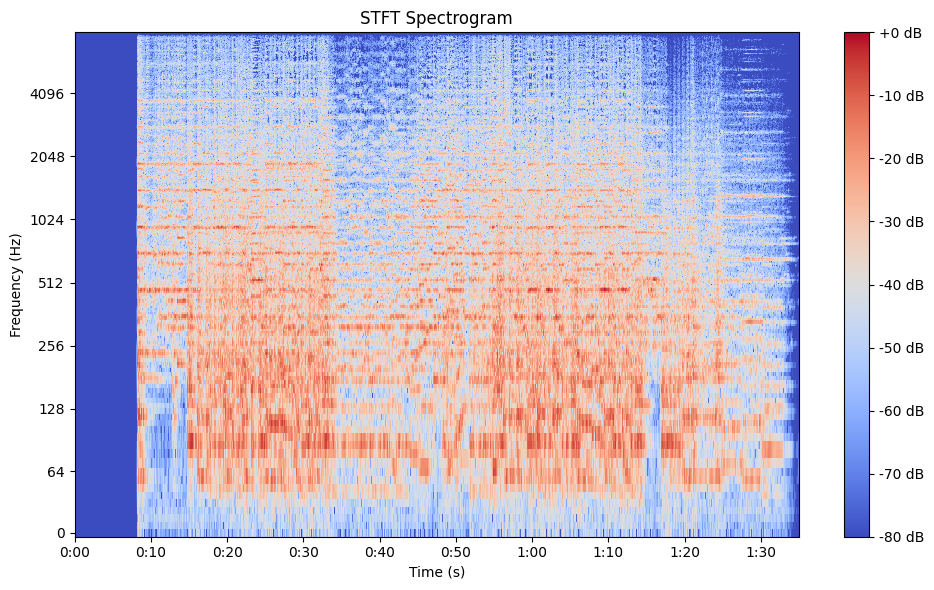

In [7]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the audio file
audio_path = "ProcessedVideos/hate_video_1/audio.wav"


y, sr = librosa.load(audio_path, sr=16000)  # y: audio time series, sr: sampling rate

# Step 2: Apply STFT
n_fft = 2048  # FFT window size
hop_length = 512  # Hop length (overlap)
stft_result = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)

# Step 3: Compute the magnitude spectrogram
spectrogram = np.abs(stft_result)

# Step 4: Convert to Decibel (dB) scale
spectrogram_db = librosa.amplitude_to_db(spectrogram, ref=np.max)

# Step 5: Plot the Spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(spectrogram_db, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='log', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()


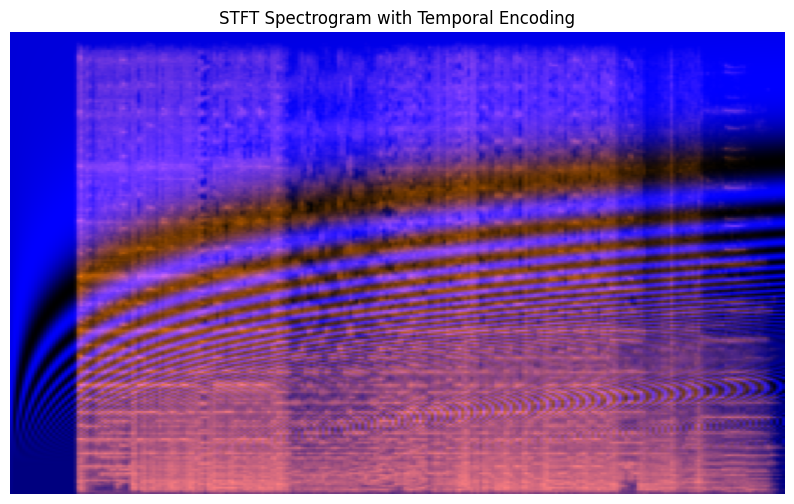

In [1]:
 import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from skimage.transform import resize

# Function to generate sine-cosine temporal encoding
def generate_temporal_encoding(time_steps, freq_bins):
    """
    Generate temporal encoding using sine-cosine functions.
    :param time_steps: Number of time steps (width of spectrogram)
    :param freq_bins: Number of frequency bins (height of spectrogram)
    :return: Temporal encoding matrix (freq_bins x time_steps)
    """
    position = np.arange(time_steps)[np.newaxis, :]  # Time axis, shape (1, time_steps)
    div_term = np.exp(np.arange(0, freq_bins) * -(np.log(10000.0) / freq_bins))[:, np.newaxis]  # Freq axis, shape (freq_bins, 1)

    # Initialize encoding matrix
    temporal_encoding = np.zeros((freq_bins, time_steps))

    # Compute sine and cosine encodings
    sine_encoding = np.sin(position * div_term)  # Shape: (freq_bins, time_steps)
    cosine_encoding = np.cos(position * div_term)  # Shape: (freq_bins, time_steps)

    # Populate temporal encoding matrix
    temporal_encoding[0:freq_bins:2, :] = sine_encoding[0:freq_bins:2, :]  # Even indices
    temporal_encoding[1:freq_bins:2, :] = cosine_encoding[1:freq_bins:2, :]  # Odd indices

    return temporal_encoding


# Function to overlay temporal encoding onto a spectrogram
def add_color_encoding_to_spectrogram(spectrogram, temporal_encoding):
    """
    Add distinct color encoding for temporal information to a spectrogram.
    :param spectrogram: 2D numpy array (frequency x time)
    :param temporal_encoding: 2D numpy array (frequency x time) with temporal information
    :return: RGB spectrogram with temporal encoding as an added color channel
    """
    # Normalize the spectrogram and encoding to [0, 1]
    spectrogram = (spectrogram - spectrogram.min()) / (spectrogram.max() - spectrogram.min())
    temporal_encoding = (temporal_encoding - temporal_encoding.min()) / (temporal_encoding.max() - temporal_encoding.min())

    # Create RGB channels
    R = spectrogram  # Original spectrogram in red channel
    G = spectrogram * 0.5  # Dimmed spectrogram in green channel
    B = temporal_encoding  # Temporal encoding in blue channel

    # Stack channels to create an RGB image
    rgb_spectrogram = np.stack([R, G, B], axis=-1)
    return rgb_spectrogram

# Function to generate and plot the spectrogram with temporal encoding
def generate_spectrogram_with_encoding(audio_path):
    """
    Generate an STFT spectrogram with temporal encoding and save/display it.
    :param audio_path: Path to the input audio file
    """
    # Step 1: Load audio
    y, sr = librosa.load(audio_path, sr=16000)

    # Step 2: Compute STFT
    n_fft = 2048
    hop_length = 512
    stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
    spectrogram = librosa.amplitude_to_db(np.abs(stft), ref=np.max)

    # Step 3: Generate temporal encoding
    time_steps, freq_bins = spectrogram.shape[1], spectrogram.shape[0]
    temporal_encoding = generate_temporal_encoding(time_steps, freq_bins)

    # Step 4: Resize spectrogram and temporal encoding to 256x256
    spectrogram_resized = resize(spectrogram, (256, 256))
    temporal_encoding_resized = resize(temporal_encoding, (256, 256))

    # Step 5: Add color encoding
    rgb_spectrogram = add_color_encoding_to_spectrogram(spectrogram_resized, temporal_encoding_resized)

    # Step 6: Plot and save the spectrogram
    plt.figure(figsize=(10, 6))
    plt.imshow(rgb_spectrogram, aspect='auto', origin='lower')
    plt.title("STFT Spectrogram with Temporal Encoding")
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.axis("off")
    plt.show()

# Example usage
audio_file = "ProcessedVideos/hate_video_1/audio.wav"
generate_spectrogram_with_encoding(audio_file)

In [2]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from skimage.transform import resize
from tqdm import tqdm

# Function to generate sine-cosine temporal encoding
def generate_temporal_encoding(time_steps, freq_bins):
    """
    Generate temporal encoding using sine-cosine functions.
    :param time_steps: Number of time steps (width of spectrogram)
    :param freq_bins: Number of frequency bins (height of spectrogram)
    :return: Temporal encoding matrix (freq_bins x time_steps)
    """
    position = np.arange(time_steps)[np.newaxis, :]  # Time axis, shape (1, time_steps)
    div_term = np.exp(np.arange(0, freq_bins) * -(np.log(10000.0) / freq_bins))[:, np.newaxis]  # Freq axis, shape (freq_bins, 1)

    # Initialize encoding matrix
    temporal_encoding = np.zeros((freq_bins, time_steps))

    # Compute sine and cosine encodings
    sine_encoding = np.sin(position * div_term)  # Shape: (freq_bins, time_steps)
    cosine_encoding = np.cos(position * div_term)  # Shape: (freq_bins, time_steps)

    # Populate temporal encoding matrix
    temporal_encoding[0:freq_bins:2, :] = sine_encoding[0:freq_bins:2, :]  # Even indices
    temporal_encoding[1:freq_bins:2, :] = cosine_encoding[1:freq_bins:2, :]  # Odd indices

    return temporal_encoding


# Function to overlay temporal encoding onto a spectrogram
def add_color_encoding_to_spectrogram(spectrogram, temporal_encoding):
    """
    Add distinct color encoding for temporal information to a spectrogram.
    :param spectrogram: 2D numpy array (frequency x time)
    :param temporal_encoding: 2D numpy array (frequency x time) with temporal information
    :return: RGB spectrogram with temporal encoding as an added color channel
    """
    # Normalize the spectrogram and encoding to [0, 1]
    spectrogram = (spectrogram - spectrogram.min()) / (spectrogram.max() - spectrogram.min())
    temporal_encoding = (temporal_encoding - temporal_encoding.min()) / (temporal_encoding.max() - temporal_encoding.min())

    # Create RGB channels
    R = spectrogram  # Original spectrogram in red channel
    G = spectrogram * 0.5  # Dimmed spectrogram in green channel
    B = temporal_encoding  # Temporal encoding in blue channel

    # Stack channels to create an RGB image
    rgb_spectrogram = np.stack([R, G, B], axis=-1)
    return rgb_spectrogram

# Function to generate and save spectrogram with temporal encoding
def generate_spectrogram_with_encoding(audio_path):
    """
    Generate an STFT spectrogram with temporal encoding and save it as an image.
    :param audio_path: Path to the input audio file
    """
    # Step 1: Load audio
    y, sr = librosa.load(audio_path, sr=16000)

    # Step 2: Compute STFT
    n_fft = 2048
    hop_length = 512
    stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
    spectrogram = librosa.amplitude_to_db(np.abs(stft), ref=np.max)

    # Step 3: Generate temporal encoding
    time_steps, freq_bins = spectrogram.shape[1], spectrogram.shape[0]
    temporal_encoding = generate_temporal_encoding(time_steps, freq_bins)

    # Step 4: Resize spectrogram and temporal encoding to 256x256
    spectrogram_resized = resize(spectrogram, (256, 256))
    temporal_encoding_resized = resize(temporal_encoding, (256, 256))

    # Step 5: Add color encoding
    rgb_spectrogram = add_color_encoding_to_spectrogram(spectrogram_resized, temporal_encoding_resized)

    # Step 6: Save the spectrogram
    output_image_path = audio_path.replace(".wav", ".png")
    plt.imsave(output_image_path, rgb_spectrogram)
    print(f"Saved spectrogram at {output_image_path}")

# Main function to process all .wav files in subdirectories
def process_all_audio_files(base_folder):
    """
    Process all .wav files in the given folder structure and save spectrogram images in the same directory.
    :param base_folder: Path to the base folder containing subdirectories with .wav files
    """
    for subdir, _, files in os.walk(base_folder):
        for file in files:
            if file.endswith(".wav"):
                audio_path = os.path.join(subdir, file)

                try:
                    generate_spectrogram_with_encoding(audio_path)
                except Exception as e:
                    print(f"Failed to process {audio_path}: {e}")

# Example usage
base_folder = "ProcessedVideos"
process_all_audio_files(base_folder)


Saved spectrogram at ProcessedVideos\hate_video_1\audio.png
Saved spectrogram at ProcessedVideos\hate_video_10\audio.png
Saved spectrogram at ProcessedVideos\hate_video_100\audio.png
Saved spectrogram at ProcessedVideos\hate_video_101\audio.png
Saved spectrogram at ProcessedVideos\hate_video_102\audio.png
Saved spectrogram at ProcessedVideos\hate_video_103\audio.png
Saved spectrogram at ProcessedVideos\hate_video_104\audio.png
Saved spectrogram at ProcessedVideos\hate_video_105\audio.png
Saved spectrogram at ProcessedVideos\hate_video_106\audio.png
Saved spectrogram at ProcessedVideos\hate_video_107\audio.png
Saved spectrogram at ProcessedVideos\hate_video_109\audio.png
Saved spectrogram at ProcessedVideos\hate_video_11\audio.png
Saved spectrogram at ProcessedVideos\hate_video_110\audio.png
Saved spectrogram at ProcessedVideos\hate_video_111\audio.png
Saved spectrogram at ProcessedVideos\hate_video_112\audio.png
Saved spectrogram at ProcessedVideos\hate_video_113\audio.png
Saved spectr

C:\Users\PRABAL YADAV\AppData\Local\Temp\ipykernel_20384\446063400.py:43: RuntimeWarning: invalid value encountered in divide
  spectrogram = (spectrogram - spectrogram.min()) / (spectrogram.max() - spectrogram.min())
C:\Users\PRABAL YADAV\Desktop\machine learning iim\venv\Lib\site-packages\matplotlib\cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


Saved spectrogram at ProcessedVideos\non_hate_video_152\audio.png
Saved spectrogram at ProcessedVideos\non_hate_video_153\audio.png
Saved spectrogram at ProcessedVideos\non_hate_video_154\audio.png
Saved spectrogram at ProcessedVideos\non_hate_video_155\audio.png
Saved spectrogram at ProcessedVideos\non_hate_video_156\audio.png
Saved spectrogram at ProcessedVideos\non_hate_video_157\audio.png
Saved spectrogram at ProcessedVideos\non_hate_video_158\audio.png
Saved spectrogram at ProcessedVideos\non_hate_video_159\audio.png
Saved spectrogram at ProcessedVideos\non_hate_video_16\audio.png
Saved spectrogram at ProcessedVideos\non_hate_video_160\audio.png
Saved spectrogram at ProcessedVideos\non_hate_video_161\audio.png
Saved spectrogram at ProcessedVideos\non_hate_video_162\audio.png
Saved spectrogram at ProcessedVideos\non_hate_video_163\audio.png
Saved spectrogram at ProcessedVideos\non_hate_video_164\audio.png
Saved spectrogram at ProcessedVideos\non_hate_video_165\audio.png
Saved spect

In [1]:
import os
import cv2
import numpy as np
from moviepy.editor import VideoFileClip
import whisper
import shutil
import wave

# Define paths
BASE_FOLDER = "./ALLVideos"
OUTPUT_FOLDER = "./ProcessedVideos"
ANNOTATION_FILE = "./ALLVideos/HateMM_annotation.csv"

# Ensure output directory exists
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# Load Whisper Model
whisper_model = whisper.load_model("base")  # You can use "tiny", "small", "base", "large" models

# Function to calculate sound intensity
def calculate_sound_intensity(audio_path):
    """
    Compute sound intensity from an audio file.
    """
    with wave.open(audio_path, 'rb') as wf:
        n_frames = wf.getnframes()
        audio_data = wf.readframes(n_frames)
        intensity = np.frombuffer(audio_data, dtype=np.int16)
        return np.abs(intensity)

# Function to extract frames from video
def extract_frames(video_path, audio_path, output_path, total_frames=50, frame_size=(224, 224)):
    """
    Extract frames based on sound intensity and evenly distribute remaining frames if needed.
    """
    cap = cv2.VideoCapture(video_path)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    total_video_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = total_video_frames / fps

    # Calculate sound intensity
    sound_intensity = calculate_sound_intensity(audio_path)
    max_intensity_index = np.argmax(sound_intensity)
    max_intensity_time = max_intensity_index / len(sound_intensity) * duration

    # Convert time of max intensity to frame number
    start_frame = int(max_intensity_time * fps)

    # Select 50 frames
    frame_indices = [start_frame]  # Start with the frame of maximum sound intensity
    additional_frames = total_frames - 1

    if additional_frames > 0:
        evenly_spaced_indices = np.linspace(0, total_video_frames - 1, additional_frames, dtype=int).tolist()
        frame_indices.extend(evenly_spaced_indices)
        frame_indices = sorted(set(frame_indices))  # Ensure unique and sorted frame indices

    os.makedirs(output_path, exist_ok=True)
    frame_count = 0
    for idx in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if not ret:
            continue

        # Resize frame to the standard size
        resized_frame = cv2.resize(frame, frame_size)
        cv2.imwrite(os.path.join(output_path, f"frame_{frame_count}.jpg"), resized_frame)
        frame_count += 1
        if frame_count == total_frames:
            break

    cap.release()
    print(f"Extracted {frame_count} frames for {video_path}.")

# Function to extract audio from video
def extract_audio(video_path, audio_output_path):
    print(f"Extracting audio from {video_path}...")
    clip = VideoFileClip(video_path)
    clip.audio.write_audiofile(audio_output_path)
    print(f"Audio saved to {audio_output_path}.")

# Function to transcribe audio using Whisper
def transcribe_audio(audio_path):
    print(f"Transcribing audio from {audio_path} using Whisper...")
    # Use Whisper to transcribe the audio
    result = whisper_model.transcribe(audio_path)
    text = result["text"]
    print("Transcription complete.")
    return text

# Main Processing Function
def process_videos(base_folder, output_folder, total_frames=50, frame_size=(224, 224)):
    for subdir, _, files in os.walk(base_folder):
        for file in files:
            if file.endswith(".mp4"):
                video_path = os.path.join(subdir, file)
                video_name = os.path.splitext(file)[0]
                video_output_folder = os.path.join(output_folder, video_name)
                os.makedirs(video_output_folder, exist_ok=True)

                # Paths for outputs
                frames_folder = os.path.join(video_output_folder, "frames")
                audio_output_path = os.path.join(video_output_folder, "audio.wav")
                text_output_path = os.path.join(video_output_folder, "transcript.txt")

                try:
                    # 1. Extract Audio
                    extract_audio(video_path, audio_output_path)
                    
                    # 2. Extract Frames
                    extract_frames(video_path, audio_output_path, frames_folder, total_frames=total_frames, frame_size=frame_size)
                    
                    # 3. Transcribe Audio
                    transcript = transcribe_audio(audio_output_path)
                    with open(text_output_path, "w") as f:
                        f.write(transcript)
                    
                    print(f"Processing completed for: {file}")
                except Exception as e:
                    print(f"Error processing {file}: {e}")

# Run the script
process_videos(BASE_FOLDER, OUTPUT_FOLDER)


Extracting audio from ./ALLVideos\hate_videos\hate_video_1.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_1\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_1\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_1.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_1\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_1.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_10.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_10\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_10\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_10.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_10\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_10.mp4: 'charmap' codec can't encode characters in position 28-29: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_100.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_100\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_100\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_100.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_100\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_100.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_101.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_101\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_101\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_101.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_101\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_101.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_102.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_102\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_102\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_102.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_102\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_102.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_103.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_103\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_103\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_103.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_103\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_103.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_104.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_104\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_104\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_104.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_104\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_104.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_105.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_105\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_105\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_105.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_105\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_105.mp4: 'charmap' codec can't encode characters in position 74-75: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_106.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_106\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_106\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_106.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_106\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_106.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_107.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_107\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_107\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_107.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_107\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_107.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_108.mp4...
Error processing hate_video_108.mp4: 'NoneType' object has no attribute 'write_audiofile'
Extracting audio from ./ALLVideos\hate_videos\hate_video_109.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_109\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_109\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_109.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_109\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_109.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_11.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_11\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_11\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_11.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_11\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_11.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_110.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_110\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_110\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_110.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_110\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_110.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_111.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_111\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_111\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_111.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_111\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_111.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_112.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_112\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_112\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_112.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_112\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_112.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_113.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_113\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_113\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_113.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_113\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_113.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_114.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_114\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_114\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_114.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_114\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_114.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_115.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_115\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_115\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_115.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_115\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_115.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_116.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_116\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_116\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_116.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_116\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_116.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_117.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_117\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_117\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_117.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_117\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_117.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_118.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_118\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_118\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_118.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_118\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_118.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_119.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_119\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_119\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_119.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_119\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_119.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_12.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_12\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_12\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_12.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_12\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_12.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_120.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_120\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_120\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_120.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_120\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_120.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_121.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_121\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_121\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_121.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_121\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_121.mp4: 'charmap' codec can't encode characters in position 0-1: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_122.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_122\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_122\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_122.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_122\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_122.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_123.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_123\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_123\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_123.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_123\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_123.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_124.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_124\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_124\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_124.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_124\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_124.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_125.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_125\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_125\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_125.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_125\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_125.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_126.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_126\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_126\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_126.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_126\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_126.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_127.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_127\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_127\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_127.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_127\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_127.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_128.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_128\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_128\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_128.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_128\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_128.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_129.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_129\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_129\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_129.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_129\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_129.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_13.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_13\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_13\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_13.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_13\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_13.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_130.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_130\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_130\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_130.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_130\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_130.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_131.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_131\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_131\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_131.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_131\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_131.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_132.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_132\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_132\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_132.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_132\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_132.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_133.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_133\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_133\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_133.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_133\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_133.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_134.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_134\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_134\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_134.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_134\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_134.mp4: 'charmap' codec can't encode character '\u4efb' in position 618: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_135.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_135\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_135\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_135.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_135\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_135.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_136.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_136\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_136\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_136.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_136\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_136.mp4: 'charmap' codec can't encode character '\u770b' in position 115: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_137.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_137\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_137\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_137.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_137\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_137.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_138.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_138\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_138\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_138.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_138\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_138.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_139.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_139\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_139\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_139.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_139\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_139.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_14.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_14\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_14\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_14.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_14\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_14.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_140.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_140\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_140\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_140.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_140\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_140.mp4: 'charmap' codec can't encode characters in position 1063-1065: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_141.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_141\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_141\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_141.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_141\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_141.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_142.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_142\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_142\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_142.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_142\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_142.mp4: 'charmap' codec can't encode characters in position 47-48: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_143.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_143\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_143\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_143.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_143\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_143.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_144.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_144\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_144\audio.wav.
Extracted 49 frames for ./ALLVideos\hate_videos\hate_video_144.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_144\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_144.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_145.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_145\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_145\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_145.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_145\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_145.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_146.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_146\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_146\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_146.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_146\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_146.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_148.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_148\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_148\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_148.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_148\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_148.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_149.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_149\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_149\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_149.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_149\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_149.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_15.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_15\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_15\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_15.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_15\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_15.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_150.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_150\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_150\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_150.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_150\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_150.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_151.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_151\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_151\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_151.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_151\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_151.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_152.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_152\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_152\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_152.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_152\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_152.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_153.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_153\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_153\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_153.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_153\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_153.mp4: 'charmap' codec can't encode characters in position 1047-1049: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_154.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_154\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_154\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_154.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_154\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_154.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_155.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_155\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_155\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_155.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_155\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_155.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_156.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_156\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_156\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_156.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_156\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_156.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_157.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_157\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_157\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_157.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_157\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_157.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_158.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_158\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_158\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_158.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_158\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_158.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_159.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_159\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_159\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_159.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_159\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_159.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_16.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_16\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_16\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_16.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_16\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_16.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_160.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_160\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_160\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_160.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_160\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_160.mp4: 'charmap' codec can't encode character '\u015f' in position 77: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_161.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_161\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_161\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_161.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_161\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_161.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_162.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_162\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_162\audio.wav.
Extracted 49 frames for ./ALLVideos\hate_videos\hate_video_162.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_162\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_162.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_163.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_163\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_163\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_163.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_163\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_163.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_164.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_164\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_164\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_164.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_164\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_164.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_165.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_165\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_165\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_165.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_165\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_165.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_166.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_166\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_166\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_166.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_166\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_166.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_167.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_167\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_167\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_167.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_167\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_167.mp4: 'charmap' codec can't encode characters in position 13-14: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_168.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_168\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_168\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_168.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_168\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_168.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_169.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_169\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_169\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_169.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_169\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_169.mp4: 'charmap' codec can't encode characters in position 6-7: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_17.mp4...
Error processing hate_video_17.mp4: 'NoneType' object has no attribute 'write_audiofile'
Extracting audio from ./ALLVideos\hate_videos\hate_video_170.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_170\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_170\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_170.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_170\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_170.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_171.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_171\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_171\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_171.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_171\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_171.mp4: 'charmap' codec can't encode characters in position 624-627: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_172.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_172\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_172\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_172.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_172\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_172.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_173.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_173\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_173\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_173.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_173\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_173.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_174.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_174\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_174\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_174.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_174\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_174.mp4: 'charmap' codec can't encode character '\ufffd' in position 27: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_175.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_175\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_175\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_175.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_175\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_175.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_176.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_176\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_176\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_176.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_176\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_176.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_177.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_177\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_177\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_177.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_177\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_177.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_178.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_178\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_178\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_178.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_178\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_178.mp4: 'charmap' codec can't encode characters in position 17-18: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_179.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_179\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_179\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_179.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_179\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_179.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_18.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_18\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_18\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_18.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_18\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_18.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_180.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_180\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_180\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_180.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_180\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_180.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_181.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_181\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_181\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_181.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_181\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_181.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_182.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_182\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_182\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_182.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_182\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_182.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_183.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_183\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_183\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_183.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_183\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_183.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_184.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_184\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_184\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_184.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_184\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_184.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_185.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_185\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_185\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_185.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_185\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_185.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_186.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_186\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_186\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_186.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_186\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_186.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_187.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_187\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_187\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_187.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_187\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_187.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_188.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_188\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_188\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_188.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_188\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_188.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_189.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_189\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_189\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_189.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_189\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_189.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_19.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_19\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_19\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_19.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_19\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_19.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_190.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_190\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_190\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_190.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_190\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_190.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_191.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_191\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_191\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_191.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_191\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_191.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_192.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_192\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_192\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_192.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_192\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_192.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_193.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_193\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_193\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_193.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_193\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_193.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_194.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_194\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_194\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_194.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_194\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_194.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_195.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_195\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_195\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_195.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_195\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_195.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_196.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_196\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_196\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_196.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_196\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_196.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_197.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_197\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_197\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_197.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_197\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_197.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_198.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_198\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_198\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_198.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_198\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_198.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_199.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_199\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_199\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_199.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_199\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_199.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_2.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_2\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_2\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_2.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_2\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_2.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_20.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_20\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_20\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_20.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_20\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_20.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_200.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_200\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_200\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_200.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_200\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_200.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_201.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_201\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_201\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_201.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_201\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_201.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_202.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_202\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_202\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_202.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_202\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_202.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_203.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_203\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_203\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_203.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_203\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_203.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_204.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_204\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_204\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_204.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_204\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_204.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_205.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_205\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_205\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_205.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_205\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_205.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_206.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_206\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_206\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_206.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_206\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_206.mp4: 'charmap' codec can't encode characters in position 54-55: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_207.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_207\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_207\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_207.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_207\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_207.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_208.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_208\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_208\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_208.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_208\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_208.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_209.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_209\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_209\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_209.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_209\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_209.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_21.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_21\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_21\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_21.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_21\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_21.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_210.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_210\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_210\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_210.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_210\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_210.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_211.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_211\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_211\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_211.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_211\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_211.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_212.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_212\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_212\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_212.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_212\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_212.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_213.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_213\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_213\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_213.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_213\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_213.mp4: 'charmap' codec can't encode characters in position 0-9: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_214.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_214\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_214\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_214.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_214\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_214.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_215.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_215\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_215\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_215.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_215\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_215.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_216.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_216\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_216\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_216.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_216\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_216.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_217.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_217\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_217\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_217.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_217\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_217.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_218.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_218\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_218\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_218.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_218\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_218.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_219.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_219\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_219\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_219.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_219\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_219.mp4: 'charmap' codec can't encode characters in position 271-272: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_22.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_22\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_22\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_22.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_22\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_22.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_220.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_220\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_220\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_220.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_220\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_220.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_221.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_221\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_221\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_221.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_221\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_221.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_222.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_222\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_222\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_222.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_222\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_222.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_223.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_223\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_223\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_223.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_223\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_223.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_224.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_224\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_224\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_224.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_224\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_224.mp4: 'charmap' codec can't encode characters in position 1700-1701: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_225.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_225\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_225\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_225.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_225\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_225.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_226.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_226\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_226\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_226.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_226\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_226.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_227.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_227\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_227\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_227.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_227\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_227.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_228.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_228\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_228\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_228.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_228\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_228.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_229.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_229\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_229\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_229.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_229\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_229.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_23.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_23\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_23\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_23.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_23\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_23.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_230.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_230\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_230\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_230.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_230\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_230.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_231.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_231\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_231\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_231.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_231\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_231.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_232.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_232\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_232\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_232.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_232\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_232.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_233.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_233\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_233\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_233.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_233\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_233.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_234.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_234\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_234\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_234.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_234\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_234.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_235.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_235\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_235\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_235.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_235\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_235.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_236.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_236\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_236\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_236.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_236\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_236.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_237.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_237\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_237\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_237.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_237\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_237.mp4: 'charmap' codec can't encode character '\u1eeb' in position 154: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_238.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_238\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_238\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_238.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_238\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_238.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_239.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_239\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_239\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_239.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_239\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_239.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_24.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_24\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_24\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_24.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_24\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_24.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_240.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_240\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_240\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_240.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_240\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_240.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_241.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_241\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_241\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_241.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_241\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_241.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_242.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_242\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_242\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_242.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_242\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_242.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_243.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_243\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_243\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_243.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_243\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_243.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_244.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_244\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_244\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_244.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_244\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_244.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_245.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_245\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_245\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_245.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_245\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_245.mp4: 'charmap' codec can't encode character '\u30e5' in position 403: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_246.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_246\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_246\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_246.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_246\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_246.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_247.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_247\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_247\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_247.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_247\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_247.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_248.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_248\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_248\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_248.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_248\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_248.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_249.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_249\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_249\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_249.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_249\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_249.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_25.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_25\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_25\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_25.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_25\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_25.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_250.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_250\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_250\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_250.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_250\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_250.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_251.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_251\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_251\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_251.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_251\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_251.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_252.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_252\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_252\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_252.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_252\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_252.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_253.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_253\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_253\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_253.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_253\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_253.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_254.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_254\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_254\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_254.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_254\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_254.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_255.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_255\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_255\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_255.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_255\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_255.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_256.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_256\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_256\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_256.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_256\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_256.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_257.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_257\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_257\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_257.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_257\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_257.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_258.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_258\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_258\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_258.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_258\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_258.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_259.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_259\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_259\audio.wav.
Extracted 49 frames for ./ALLVideos\hate_videos\hate_video_259.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_259\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_259.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_26.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_26\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_26\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_26.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_26\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_26.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_260.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_260\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_260\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_260.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_260\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_260.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_261.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_261\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_261\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_261.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_261\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_261.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_262.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_262\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_262\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_262.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_262\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_262.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_263.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_263\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_263\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_263.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_263\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_263.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_264.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_264\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_264\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_264.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_264\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_264.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_265.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_265\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_265\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_265.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_265\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_265.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_266.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_266\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_266\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_266.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_266\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_266.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_267.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_267\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_267\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_267.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_267\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_267.mp4: 'charmap' codec can't encode characters in position 206-207: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_268.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_268\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_268\audio.wav.


Extracted 49 frames for ./ALLVideos\hate_videos\hate_video_268.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_268\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_268.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_269.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_269\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_269\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_269.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_269\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_269.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_27.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_27\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_27\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_27.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_27\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_27.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_270.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_270\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_270\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_270.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_270\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_270.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_271.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_271\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_271\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_271.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_271\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_271.mp4: 'charmap' codec can't encode characters in position 132-137: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_272.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_272\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_272\audio.wav.


Extracted 34 frames for ./ALLVideos\hate_videos\hate_video_272.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_272\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_272.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_273.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_273\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_273\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_273.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_273\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_273.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_274.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_274\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_274\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_274.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_274\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_274.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_275.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_275\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_275\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_275.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_275\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_275.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_276.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_276\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_276\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_276.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_276\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_276.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_277.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_277\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_277\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_277.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_277\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_277.mp4: 'charmap' codec can't encode character '\u1eb9' in position 3: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_278.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_278\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_278\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_278.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_278\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_278.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_279.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_279\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_279\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_279.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_279\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_279.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_28.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_28\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_28\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_28.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_28\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_28.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_280.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_280\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_280\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_280.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_280\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_280.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_281.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_281\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_281\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_281.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_281\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_281.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_282.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_282\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_282\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_282.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_282\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_282.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_283.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_283\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_283\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_283.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_283\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_283.mp4: 'charmap' codec can't encode characters in position 110-111: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_284.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_284\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_284\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_284.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_284\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_284.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_285.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_285\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_285\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_285.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_285\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_285.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_286.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_286\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_286\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_286.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_286\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_286.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_287.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_287\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_287\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_287.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_287\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_287.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_288.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_288\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_288\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_288.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_288\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_288.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_289.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_289\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_289\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_289.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_289\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_289.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_29.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_29\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_29\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_29.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_29\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_29.mp4: 'charmap' codec can't encode character '\u968a' in position 3787: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_290.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_290\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_290\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_290.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_290\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_290.mp4: 'charmap' codec can't encode characters in position 1-7: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_291.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_291\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_291\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_291.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_291\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_291.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_293.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_293\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_293\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_293.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_293\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_293.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_294.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_294\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_294\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_294.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_294\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_294.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_295.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_295\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_295\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_295.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_295\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_295.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_296.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_296\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_296\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_296.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_296\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_296.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_297.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_297\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_297\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_297.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_297\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_297.mp4: 'charmap' codec can't encode character '\u0449' in position 2: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_298.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_298\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_298\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_298.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_298\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_298.mp4: 'charmap' codec can't encode character '\u901f' in position 380: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_299.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_299\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_299\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_299.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_299\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_299.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_3.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_3\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_3\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_3.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_3\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_3.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_30.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_30\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_30\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_30.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_30\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_30.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_300.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_300\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_300\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_300.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_300\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_300.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_301.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_301\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_301\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_301.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_301\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_301.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_302.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_302\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_302\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_302.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_302\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_302.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_303.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_303\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_303\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_303.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_303\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_303.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_304.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_304\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_304\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_304.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_304\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_304.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_305.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_305\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_305\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_305.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_305\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_305.mp4: 'charmap' codec can't encode characters in position 831-835: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_306.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_306\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_306\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_306.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_306\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_306.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_307.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_307\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_307\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_307.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_307\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_307.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_308.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_308\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_308\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_308.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_308\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_308.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_309.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_309\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_309\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_309.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_309\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_309.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_31.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_31\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_31\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_31.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_31\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_31.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_310.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_310\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_310\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_310.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_310\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_310.mp4: 'charmap' codec can't encode character '\ufffd' in position 741: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_311.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_311\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_311\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_311.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_311\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_311.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_312.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_312\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_312\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_312.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_312\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_312.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_313.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_313\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_313\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_313.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_313\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_313.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_314.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_314\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_314\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_314.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_314\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_314.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_315.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_315\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_315\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_315.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_315\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_315.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_316.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_316\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_316\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_316.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_316\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_316.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_317.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_317\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_317\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_317.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_317\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_317.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_318.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_318\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_318\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_318.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_318\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_318.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_319.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_319\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_319\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_319.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_319\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_319.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_32.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_32\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_32\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_32.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_32\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_32.mp4: 'charmap' codec can't encode characters in position 1441-1442: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_320.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_320\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_320\audio.wav.


Extracted 49 frames for ./ALLVideos\hate_videos\hate_video_320.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_320\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_320.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_321.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_321\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_321\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_321.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_321\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_321.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_322.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_322\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_322\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_322.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_322\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_322.mp4: 'charmap' codec can't encode characters in position 0-2: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_323.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_323\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_323\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_323.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_323\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_323.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_324.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_324\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_324\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_324.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_324\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_324.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_325.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_325\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_325\audio.wav.


Extracted 49 frames for ./ALLVideos\hate_videos\hate_video_325.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_325\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_325.mp4: 'charmap' codec can't encode characters in position 1-2: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_326.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_326\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_326\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_326.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_326\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_326.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_327.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_327\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_327\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_327.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_327\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_327.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_328.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_328\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_328\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_328.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_328\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_328.mp4: 'charmap' codec can't encode characters in position 24-25: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_329.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_329\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_329\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_329.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_329\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_329.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_33.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_33\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_33\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_33.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_33\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_33.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_330.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_330\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_330\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_330.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_330\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_330.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_331.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_331\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_331\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_331.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_331\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_331.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_332.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_332\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_332\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_332.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_332\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_332.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_333.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_333\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_333\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_333.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_333\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_333.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_334.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_334\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_334\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_334.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_334\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_334.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_335.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_335\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_335\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_335.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_335\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_335.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_336.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_336\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_336\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_336.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_336\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_336.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_337.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_337\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_337\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_337.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_337\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_337.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_338.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_338\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_338\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_338.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_338\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_338.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_339.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_339\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_339\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_339.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_339\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_339.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_34.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_34\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_34\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_34.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_34\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_34.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_340.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_340\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_340\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_340.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_340\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_340.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_341.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_341\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_341\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_341.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_341\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_341.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_342.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_342\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_342\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_342.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_342\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_342.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_343.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_343\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_343\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_343.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_343\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_343.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_344.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_344\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_344\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_344.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_344\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_344.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_345.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_345\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_345\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_345.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_345\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_345.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_346.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_346\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_346\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_346.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_346\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_346.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_347.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_347\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_347\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_347.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_347\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_347.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_348.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_348\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_348\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_348.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_348\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_348.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_349.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_349\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_349\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_349.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_349\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_349.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_35.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_35\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_35\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_35.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_35\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_35.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_350.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_350\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_350\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_350.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_350\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_350.mp4: 'charmap' codec can't encode characters in position 58-60: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_351.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_351\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_351\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_351.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_351\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_351.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_352.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_352\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_352\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_352.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_352\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_352.mp4: 'charmap' codec can't encode character '\U0001f3b5' in position 1: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_353.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_353\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_353\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_353.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_353\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_353.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_354.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_354\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_354\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_354.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_354\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_354.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_355.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_355\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_355\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_355.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_355\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_355.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_356.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_356\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_356\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_356.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_356\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_356.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_357.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_357\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_357\audio.wav.


Extracted 49 frames for ./ALLVideos\hate_videos\hate_video_357.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_357\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_357.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_358.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_358\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_358\audio.wav.


Extracted 49 frames for ./ALLVideos\hate_videos\hate_video_358.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_358\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_358.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_359.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_359\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_359\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_359.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_359\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_359.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_36.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_36\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_36\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_36.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_36\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_36.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_360.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_360\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_360\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_360.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_360\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_360.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_361.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_361\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_361\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_361.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_361\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_361.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_362.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_362\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_362\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_362.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_362\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_362.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_363.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_363\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_363\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_363.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_363\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_363.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_364.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_364\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_364\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_364.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_364\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_364.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_365.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_365\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_365\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_365.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_365\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_365.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_366.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_366\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_366\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_366.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_366\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_366.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_367.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_367\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_367\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_367.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_367\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_367.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_368.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_368\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_368\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_368.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_368\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_368.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_369.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_369\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_369\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_369.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_369\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_369.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_37.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_37\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_37\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_37.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_37\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_37.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_370.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_370\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_370\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_370.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_370\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_370.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_371.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_371\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_371\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_371.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_371\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_371.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_372.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_372\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_372\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_372.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_372\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_372.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_373.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_373\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_373\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_373.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_373\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_373.mp4: 'charmap' codec can't encode character '\uc5ed' in position 1097: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_374.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_374\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_374\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_374.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_374\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_374.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_375.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_375\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_375\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_375.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_375\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_375.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_376.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_376\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_376\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_376.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_376\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_376.mp4: 'charmap' codec can't encode character '\u1ec1' in position 27: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_377.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_377\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_377\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_377.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_377\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_377.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_378.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_378\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_378\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_378.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_378\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_378.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_379.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_379\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_379\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_379.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_379\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_379.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_38.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_38\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_38\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_38.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_38\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_38.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_380.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_380\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_380\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_380.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_380\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_380.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_381.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_381\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_381\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_381.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_381\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_381.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_382.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_382\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_382\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_382.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_382\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_382.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_383.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_383\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_383\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_383.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_383\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_383.mp4: 'charmap' codec can't encode characters in position 1-3: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_384.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_384\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_384\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_384.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_384\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_384.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_386.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_386\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_386\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_386.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_386\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_386.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_387.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_387\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_387\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_387.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_387\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_387.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_388.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_388\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_388\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_388.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_388\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_388.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_389.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_389\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_389\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_389.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_389\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_389.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_39.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_39\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_39\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_39.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_39\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_39.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_390.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_390\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_390\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_390.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_390\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_390.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_391.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_391\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_391\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_391.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_391\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_391.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_392.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_392\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_392\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_392.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_392\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_392.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_393.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_393\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_393\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_393.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_393\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_393.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_394.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_394\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_394\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_394.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_394\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_394.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_395.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_395\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_395\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_395.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_395\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_395.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_396.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_396\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_396\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_396.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_396\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_396.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_397.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_397\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_397\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_397.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_397\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_397.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_398.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_398\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_398\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_398.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_398\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_398.mp4: 'charmap' codec can't encode character '\u015f' in position 806: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_399.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_399\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_399\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_399.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_399\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_399.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_4.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_4\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_4\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_4.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_4\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_4.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_40.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_40\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_40\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_40.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_40\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_40.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_400.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_400\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_400\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_400.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_400\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_400.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_401.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_401\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_401\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_401.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_401\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_401.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_402.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_402\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_402\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_402.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_402\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_402.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_403.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_403\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_403\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_403.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_403\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_403.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_404.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_404\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_404\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_404.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_404\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_404.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_405.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_405\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_405\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_405.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_405\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_405.mp4: 'charmap' codec can't encode characters in position 1-5: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_406.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_406\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_406\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_406.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_406\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_406.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_407.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_407\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_407\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_407.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_407\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_407.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_408.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_408\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_408\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_408.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_408\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_408.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_409.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_409\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_409\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_409.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_409\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_409.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_41.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_41\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_41\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_41.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_41\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_41.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_410.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_410\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_410\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_410.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_410\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_410.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_411.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_411\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_411\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_411.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_411\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_411.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_412.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_412\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_412\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_412.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_412\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_412.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_413.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_413\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_413\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_413.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_413\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_413.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_414.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_414\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_414\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_414.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_414\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_414.mp4: 'charmap' codec can't encode character '\u3070' in position 1013: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_415.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_415\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_415\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_415.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_415\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_415.mp4: 'charmap' codec can't encode character '\u97e6' in position 294: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_416.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_416\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_416\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_416.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_416\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_416.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_417.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_417\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_417\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_417.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_417\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_417.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_418.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_418\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_418\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_418.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_418\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_418.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_419.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_419\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_419\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_419.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_419\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_419.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_42.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_42\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_42\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_42.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_42\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_42.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_420.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_420\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_420\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_420.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_420\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_420.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_421.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_421\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_421\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_421.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_421\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_421.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_422.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_422\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_422\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_422.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_422\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_422.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_423.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_423\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_423\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_423.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_423\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_423.mp4: 'charmap' codec can't encode character '\u95fb' in position 3: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_424.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_424\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_424\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_424.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_424\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_424.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_425.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_425\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_425\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_425.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_425\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_425.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_426.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_426\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_426\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_426.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_426\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_426.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_427.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_427\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_427\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_427.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_427\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_427.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_428.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_428\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_428\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_428.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_428\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_428.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_429.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_429\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_429\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_429.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_429\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_429.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_43.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_43\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_43\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_43.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_43\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_43.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_430.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_430\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_430\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_430.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_430\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_430.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_431.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_431\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_431\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_431.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_431\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_431.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_44.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_44\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_44\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_44.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_44\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_44.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_45.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_45\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_45\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_45.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_45\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_45.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_46.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_46\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_46\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_46.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_46\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_46.mp4: 'charmap' codec can't encode characters in position 16-18: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_47.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_47\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_47\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_47.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_47\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_47.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_48.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_48\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_48\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_48.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_48\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_48.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_49.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_49\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_49\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_49.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_49\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_49.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_5.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_5\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_5\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_5.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_5\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_5.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_50.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_50\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_50\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_50.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_50\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_50.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_51.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_51\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_51\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_51.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_51\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_51.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_52.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_52\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_52\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_52.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_52\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_52.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_53.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_53\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_53\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_53.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_53\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_53.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_54.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_54\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_54\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_54.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_54\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_54.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_55.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_55\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_55\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_55.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_55\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_55.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_56.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_56\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_56\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_56.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_56\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_56.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_57.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_57\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_57\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_57.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_57\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_57.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_58.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_58\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_58\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_58.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_58\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_58.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_59.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_59\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_59\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_59.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_59\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_59.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_6.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_6\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_6\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_6.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_6\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_6.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_60.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_60\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_60\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_60.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_60\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_60.mp4: 'charmap' codec can't encode character '\u7a9f' in position 1050: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_61.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_61\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_61\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_61.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_61\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_61.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_62.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_62\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_62\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_62.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_62\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_62.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_63.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_63\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_63\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_63.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_63\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_63.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_64.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_64\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_64\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_64.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_64\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_64.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_65.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_65\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_65\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_65.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_65\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_65.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_66.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_66\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_66\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_66.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_66\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_66.mp4: 'charmap' codec can't encode character '\u03bd' in position 58: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_67.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_67\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_67\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_67.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_67\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_67.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_68.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_68\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_68\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_68.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_68\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_68.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_69.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_69\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_69\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_69.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_69\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_69.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_7.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_7\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_7\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_7.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_7\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_7.mp4: 'charmap' codec can't encode characters in position 26-28: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_70.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_70\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_70\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_70.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_70\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_70.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_71.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_71\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_71\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_71.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_71\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_71.mp4: 'charmap' codec can't encode characters in position 1-2: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_72.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_72\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_72\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_72.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_72\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_72.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_73.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_73\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_73\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_73.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_73\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_73.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_74.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_74\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_74\audio.wav.
Extracted 49 frames for ./ALLVideos\hate_videos\hate_video_74.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_74\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_74.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_75.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_75\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_75\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_75.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_75\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_75.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_76.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_76\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_76\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_76.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_76\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_76.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_77.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_77\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_77\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_77.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_77\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_77.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_78.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_78\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_78\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_78.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_78\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_78.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_79.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_79\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_79\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_79.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_79\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_79.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_8.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_8\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_8\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_8.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_8\audio.wav using Whisper...
Transcription complete.
Error processing hate_video_8.mp4: 'charmap' codec can't encode characters in position 565-568: character maps to <undefined>
Extracting audio from ./ALLVideos\hate_videos\hate_video_80.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_80\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_80\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_80.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_80\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_80.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_81.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_81\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_81\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_81.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_81\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_81.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_82.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_82\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_82\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_82.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_82\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_82.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_83.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_83\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_83\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_83.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_83\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_83.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_84.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_84\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_84\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_84.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_84\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_84.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_85.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_85\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_85\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_85.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_85\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_85.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_86.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_86\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_86\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_86.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_86\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_86.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_87.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_87\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_87\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_87.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_87\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_87.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_88.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_88\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_88\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_88.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_88\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_88.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_89.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_89\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_89\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_89.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_89\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_89.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_9.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_9\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_9\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_9.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_9\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_9.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_90.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_90\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_90\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_90.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_90\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_90.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_91.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_91\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_91\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_91.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_91\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_91.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_92.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_92\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_92\audio.wav.


Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_92.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_92\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_92.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_93.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_93\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_93\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_93.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_93\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_93.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_94.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_94\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_94\audio.wav.
Extracted 49 frames for ./ALLVideos\hate_videos\hate_video_94.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_94\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_94.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_95.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_95\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_95\audio.wav.
Extracted 46 frames for ./ALLVideos\hate_videos\hate_video_95.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_95\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_95.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_96.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_96\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_96\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_96.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_96\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_96.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_97.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_97\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_97\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_97.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_97\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_97.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_98.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_98\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_98\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_98.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_98\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_98.mp4
Extracting audio from ./ALLVideos\hate_videos\hate_video_99.mp4...
MoviePy - Writing audio in ./ProcessedVideos\hate_video_99\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\hate_video_99\audio.wav.
Extracted 50 frames for ./ALLVideos\hate_videos\hate_video_99.mp4.
Transcribing audio from ./ProcessedVideos\hate_video_99\audio.wav using Whisper...
Transcription complete.
Processing completed for: hate_video_99.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_1.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_1\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_1\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_1.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_1\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_1.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_10.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_10\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_10\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_10.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_10\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_10.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_100.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_100\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_100\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_100.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_100\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_100.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_101.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_101\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_101\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_101.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_101\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_101.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_102.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_102\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_102\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_102.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_102\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_102.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_103.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_103\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_103\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_103.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_103\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_103.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_104.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_104\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_104\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_104.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_104\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_104.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_105.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_105\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_105\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_105.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_105\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_105.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_106.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_106\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_106\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_106.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_106\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_106.mp4: 'charmap' codec can't encode character '\u016f' in position 24: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_107.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_107\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_107\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_107.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_107\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_107.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_108.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_108\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_108\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_108.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_108\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_108.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_109.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_109\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_109\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_109.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_109\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_109.mp4: 'charmap' codec can't encode characters in position 529-534: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_11.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_11\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_11\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_11.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_11\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_11.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_110.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_110\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_110\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_110.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_110\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_110.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_111.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_111\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_111\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_111.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_111\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_111.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_112.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_112\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_112\audio.wav.


Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_112.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_112\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_112.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_113.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_113\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_113\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_113.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_113\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_113.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_114.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_114\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_114\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_114.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_114\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_114.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_115.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_115\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_115\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_115.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_115\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_115.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_116.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_116\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_116\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_116.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_116\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_116.mp4: 'charmap' codec can't encode characters in position 5-12: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_117.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_117\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_117\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_117.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_117\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_117.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_118.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_118\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_118\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_118.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_118\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_118.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_119.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_119\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_119\audio.wav.


Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_119.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_119\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_119.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_12.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_12\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_12\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_12.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_12\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_12.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_120.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_120\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_120\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_120.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_120\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_120.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_121.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_121\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_121\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_121.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_121\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_121.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_122.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_122\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_122\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_122.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_122\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_122.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_123.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_123\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_123\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_123.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_123\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_123.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_124.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_124\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_124\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_124.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_124\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_124.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_125.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_125\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_125\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_125.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_125\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_125.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_126.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_126\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_126\audio.wav.
Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_126.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_126\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_126.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_127.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_127\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_127\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_127.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_127\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_127.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_128.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_128\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_128\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_128.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_128\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_128.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_129.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_129\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_129\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_129.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_129\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_129.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_13.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_13\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_13\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_13.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_13\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_13.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_130.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_130\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_130\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_130.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_130\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_130.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_131.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_131\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_131\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_131.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_131\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_131.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_132.mp4...
Error processing non_hate_video_132.mp4: 'NoneType' object has no attribute 'write_audiofile'
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_133.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_133\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_133\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_133.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_133\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_133.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_134.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_134\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_134\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_134.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_134\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_134.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_135.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_135\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_135\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_135.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_135\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_135.mp4: 'charmap' codec can't encode characters in position 1-2: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_136.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_136\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_136\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_136.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_136\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_136.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_137.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_137\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_137\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_137.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_137\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_137.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_138.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_138\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_138\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_138.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_138\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_138.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_139.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_139\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_139\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_139.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_139\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_139.mp4: 'charmap' codec can't encode characters in position 3-4: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_14.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_14\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_14\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_14.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_14\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_14.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_140.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_140\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_140\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_140.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_140\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_140.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_141.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_141\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_141\audio.wav.


Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_141.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_141\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_141.mp4: 'charmap' codec can't encode character '\u30e9' in position 0: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_142.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_142\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_142\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_142.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_142\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_142.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_143.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_143\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_143\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_143.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_143\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_143.mp4: 'charmap' codec can't encode characters in position 0-3: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_144.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_144\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_144\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_144.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_144\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_144.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_145.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_145\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_145\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_145.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_145\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_145.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_146.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_146\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_146\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_146.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_146\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_146.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_147.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_147\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_147\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_147.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_147\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_147.mp4: 'charmap' codec can't encode characters in position 1-6: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_148.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_148\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_148\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_148.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_148\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_148.mp4: 'charmap' codec can't encode characters in position 17-21: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_149.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_149\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_149\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_149.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_149\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_149.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_15.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_15\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_15\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_15.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_15\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_15.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_150.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_150\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_150\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_150.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_150\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_150.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_151.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_151\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_151\audio.wav.


Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_151.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_151\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_151.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_152.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_152\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_152\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_152.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_152\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_152.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_153.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_153\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_153\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_153.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_153\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_153.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_154.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_154\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_154\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_154.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_154\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_154.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_155.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_155\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_155\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_155.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_155\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_155.mp4: 'charmap' codec can't encode characters in position 1-7: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_156.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_156\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_156\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_156.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_156\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_156.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_157.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_157\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_157\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_157.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_157\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_157.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_158.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_158\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_158\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_158.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_158\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_158.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_159.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_159\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_159\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_159.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_159\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_159.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_16.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_16\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_16\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_16.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_16\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_16.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_160.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_160\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_160\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_160.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_160\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_160.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_161.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_161\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_161\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_161.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_161\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_161.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_162.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_162\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_162\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_162.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_162\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_162.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_163.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_163\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_163\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_163.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_163\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_163.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_164.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_164\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_164\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_164.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_164\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_164.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_165.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_165\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_165\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_165.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_165\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_165.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_166.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_166\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_166\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_166.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_166\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_166.mp4: 'charmap' codec can't encode character '\u50d5' in position 62: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_167.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_167\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_167\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_167.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_167\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_167.mp4: 'charmap' codec can't encode character '\u662f' in position 16: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_168.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_168\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_168\audio.wav.
Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_168.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_168\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_168.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_169.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_169\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_169\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_169.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_169\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_169.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_17.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_17\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_17\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_17.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_17\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_17.mp4: 'charmap' codec can't encode character '\uc55e' in position 281: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_170.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_170\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_170\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_170.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_170\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_170.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_171.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_171\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_171\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_171.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_171\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_171.mp4: 'charmap' codec can't encode character '\u015f' in position 327: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_172.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_172\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_172\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_172.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_172\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_172.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_173.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_173\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_173\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_173.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_173\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_173.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_174.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_174\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_174\audio.wav.


Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_174.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_174\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_174.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_175.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_175\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_175\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_175.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_175\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_175.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_176.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_176\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_176\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_176.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_176\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_176.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_177.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_177\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_177\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_177.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_177\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_177.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_178.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_178\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_178\audio.wav.


Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_178.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_178\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_178.mp4: 'charmap' codec can't encode characters in position 0-2: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_179.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_179\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_179\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_179.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_179\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_179.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_18.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_18\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_18\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_18.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_18\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_18.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_180.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_180\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_180\audio.wav.


Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_180.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_180\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_180.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_181.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_181\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_181\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_181.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_181\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_181.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_182.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_182\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_182\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_182.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_182\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_182.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_183.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_183\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_183\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_183.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_183\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_183.mp4: 'charmap' codec can't encode character '\u4ee5' in position 266: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_184.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_184\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_184\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_184.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_184\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_184.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_185.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_185\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_185\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_185.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_185\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_185.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_186.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_186\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_186\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_186.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_186\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_186.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_187.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_187\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_187\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_187.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_187\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_187.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_188.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_188\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_188\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_188.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_188\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_188.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_189.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_189\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_189\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_189.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_189\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_189.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_19.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_19\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_19\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_19.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_19\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_19.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_190.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_190\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_190\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_190.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_190\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_190.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_191.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_191\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_191\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_191.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_191\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_191.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_192.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_192\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_192\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_192.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_192\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_192.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_193.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_193\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_193\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_193.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_193\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_193.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_194.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_194\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_194\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_194.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_194\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_194.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_195.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_195\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_195\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_195.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_195\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_195.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_196.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_196\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_196\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_196.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_196\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_196.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_197.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_197\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_197\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_197.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_197\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_197.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_198.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_198\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_198\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_198.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_198\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_198.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_199.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_199\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_199\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_199.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_199\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_199.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_2.mp4...
Error processing non_hate_video_2.mp4: 'NoneType' object has no attribute 'write_audiofile'
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_20.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_20\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_20\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_20.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_20\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_20.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_200.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_200\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_200\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_200.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_200\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_200.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_201.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_201\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_201\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_201.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_201\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_201.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_202.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_202\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_202\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_202.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_202\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_202.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_203.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_203\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_203\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_203.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_203\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_203.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_204.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_204\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_204\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_204.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_204\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_204.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_205.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_205\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_205\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_205.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_205\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_205.mp4: 'charmap' codec can't encode character '\u524d' in position 22: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_206.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_206\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_206\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_206.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_206\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_206.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_207.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_207\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_207\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_207.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_207\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_207.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_208.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_208\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_208\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_208.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_208\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_208.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_209.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_209\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_209\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_209.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_209\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_209.mp4: 'charmap' codec can't encode characters in position 1-2: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_21.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_21\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_21\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_21.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_21\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_21.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_210.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_210\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_210\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_210.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_210\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_210.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_211.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_211\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_211\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_211.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_211\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_211.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_212.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_212\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_212\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_212.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_212\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_212.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_213.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_213\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_213\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_213.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_213\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_213.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_214.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_214\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_214\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_214.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_214\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_214.mp4: 'charmap' codec can't encode character '\ufffd' in position 752: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_215.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_215\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_215\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_215.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_215\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_215.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_216.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_216\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_216\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_216.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_216\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_216.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_217.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_217\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_217\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_217.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_217\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_217.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_218.mp4...
Error processing non_hate_video_218.mp4: 'NoneType' object has no attribute 'write_audiofile'
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_219.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_219\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_219\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_219.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_219\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_219.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_22.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_22\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_22\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_22.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_22\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_22.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_220.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_220\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_220\audio.wav.
Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_220.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_220\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_220.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_221.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_221\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_221\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_221.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_221\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_221.mp4: 'charmap' codec can't encode characters in position 0-1: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_222.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_222\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_222\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_222.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_222\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_222.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_223.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_223\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_223\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_223.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_223\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_223.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_224.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_224\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_224\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_224.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_224\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_224.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_225.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_225\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_225\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_225.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_225\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_225.mp4: 'charmap' codec can't encode characters in position 1-8: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_226.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_226\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_226\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_226.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_226\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_226.mp4: 'charmap' codec can't encode characters in position 1-4: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_227.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_227\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_227\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_227.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_227\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_227.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_228.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_228\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_228\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_228.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_228\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_228.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_229.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_229\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_229\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_229.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_229\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_229.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_23.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_23\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_23\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_23.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_23\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_23.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_230.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_230\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_230\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_230.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_230\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_230.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_231.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_231\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_231\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_231.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_231\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_231.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_232.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_232\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_232\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_232.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_232\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_232.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_233.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_233\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_233\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_233.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_233\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_233.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_234.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_234\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_234\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_234.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_234\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_234.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_235.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_235\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_235\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_235.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_235\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_235.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_236.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_236\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_236\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_236.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_236\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_236.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_237.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_237\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_237\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_237.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_237\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_237.mp4: 'charmap' codec can't encode characters in position 1-2: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_238.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_238\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_238\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_238.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_238\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_238.mp4: 'charmap' codec can't encode characters in position 80-82: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_239.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_239\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_239\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_239.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_239\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_239.mp4: 'charmap' codec can't encode characters in position 53-54: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_24.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_24\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_24\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_24.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_24\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_24.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_240.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_240\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_240\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_240.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_240\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_240.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_241.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_241\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_241\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_241.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_241\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_241.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_242.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_242\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_242\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_242.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_242\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_242.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_243.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_243\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_243\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_243.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_243\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_243.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_244.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_244\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_244\audio.wav.


Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_244.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_244\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_244.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_245.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_245\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_245\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_245.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_245\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_245.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_246.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_246\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_246\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_246.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_246\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_246.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_247.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_247\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_247\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_247.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_247\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_247.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_248.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_248\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_248\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_248.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_248\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_248.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_249.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_249\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_249\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_249.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_249\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_249.mp4: 'charmap' codec can't encode characters in position 0-5: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_25.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_25\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_25\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_25.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_25\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_25.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_250.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_250\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_250\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_250.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_250\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_250.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_251.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_251\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_251\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_251.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_251\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_251.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_252.mp4...
Error processing non_hate_video_252.mp4: 'NoneType' object has no attribute 'write_audiofile'
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_253.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_253\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_253\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_253.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_253\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_253.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_254.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_254\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_254\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_254.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_254\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_254.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_255.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_255\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_255\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_255.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_255\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_255.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_256.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_256\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_256\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_256.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_256\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_256.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_257.mp4...
Error processing non_hate_video_257.mp4: 'NoneType' object has no attribute 'write_audiofile'
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_258.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_258\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_258\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_258.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_258\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_258.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_259.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_259\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_259\audio.wav.


Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_259.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_259\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_259.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_26.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_26\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_26\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_26.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_26\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_26.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_260.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_260\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_260\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_260.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_260\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_260.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_261.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_261\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_261\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_261.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_261\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_261.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_262.mp4...
Error processing non_hate_video_262.mp4: 'NoneType' object has no attribute 'write_audiofile'
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_263.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_263\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_263\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_263.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_263\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_263.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_264.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_264\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_264\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_264.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_264\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_264.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_265.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_265\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_265\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_265.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_265\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_265.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_266.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_266\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_266\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_266.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_266\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_266.mp4: 'charmap' codec can't encode characters in position 86-88: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_267.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_267\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_267\audio.wav.
Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_267.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_267\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_267.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_268.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_268\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_268\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_268.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_268\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_268.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_269.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_269\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_269\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_269.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_269\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_269.mp4: 'charmap' codec can't encode characters in position 210-211: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_27.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_27\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_27\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_27.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_27\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_27.mp4: 'charmap' codec can't encode character '\u6293' in position 2: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_270.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_270\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_270\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_270.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_270\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_270.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_271.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_271\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_271\audio.wav.


Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_271.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_271\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_271.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_272.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_272\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_272\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_272.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_272\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_272.mp4: 'charmap' codec can't encode characters in position 8-10: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_273.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_273\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_273\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_273.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_273\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_273.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_274.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_274\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_274\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_274.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_274\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_274.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_275.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_275\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_275\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_275.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_275\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_275.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_276.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_276\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_276\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_276.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_276\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_276.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_277.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_277\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_277\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_277.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_277\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_277.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_278.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_278\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_278\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_278.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_278\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_278.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_279.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_279\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_279\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_279.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_279\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_279.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_28.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_28\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_28\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_28.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_28\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_28.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_280.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_280\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_280\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_280.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_280\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_280.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_281.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_281\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_281\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_281.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_281\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_281.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_282.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_282\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_282\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_282.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_282\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_282.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_283.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_283\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_283\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_283.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_283\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_283.mp4: 'charmap' codec can't encode character '\u8b70' in position 0: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_284.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_284\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_284\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_284.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_284\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_284.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_285.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_285\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_285\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_285.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_285\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_285.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_286.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_286\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_286\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_286.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_286\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_286.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_287.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_287\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_287\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_287.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_287\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_287.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_288.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_288\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_288\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_288.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_288\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_288.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_289.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_289\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_289\audio.wav.
Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_289.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_289\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_289.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_29.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_29\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_29\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_29.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_29\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_29.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_290.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_290\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_290\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_290.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_290\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_290.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_291.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_291\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_291\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_291.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_291\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_291.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_292.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_292\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_292\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_292.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_292\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_292.mp4: 'charmap' codec can't encode character '\ufffd' in position 6: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_293.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_293\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_293\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_293.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_293\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_293.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_294.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_294\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_294\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_294.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_294\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_294.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_295.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_295\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_295\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_295.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_295\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_295.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_296.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_296\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_296\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_296.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_296\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_296.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_297.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_297\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_297\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_297.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_297\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_297.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_298.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_298\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_298\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_298.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_298\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_298.mp4: 'charmap' codec can't encode character '\ufffd' in position 47: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_299.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_299\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_299\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_299.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_299\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_299.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_3.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_3\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_3\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_3.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_3\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_3.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_30.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_30\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_30\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_30.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_30\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_30.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_300.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_300\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_300\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_300.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_300\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_300.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_301.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_301\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_301\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_301.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_301\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_301.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_302.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_302\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_302\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_302.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_302\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_302.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_303.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_303\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_303\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_303.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_303\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_303.mp4: 'charmap' codec can't encode character '\u5343' in position 99: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_304.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_304\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_304\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_304.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_304\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_304.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_305.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_305\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_305\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_305.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_305\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_305.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_306.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_306\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_306\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_306.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_306\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_306.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_307.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_307\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_307\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_307.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_307\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_307.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_308.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_308\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_308\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_308.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_308\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_308.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_309.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_309\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_309\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_309.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_309\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_309.mp4: 'charmap' codec can't encode character '\u91ce' in position 211: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_31.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_31\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_31\audio.wav.


Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_31.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_31\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_31.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_310.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_310\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_310\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_310.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_310\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_310.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_311.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_311\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_311\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_311.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_311\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_311.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_312.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_312\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_312\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_312.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_312\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_312.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_313.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_313\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_313\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_313.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_313\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_313.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_314.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_314\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_314\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_314.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_314\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_314.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_315.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_315\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_315\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_315.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_315\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_315.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_316.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_316\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_316\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_316.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_316\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_316.mp4: 'charmap' codec can't encode characters in position 0-7: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_317.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_317\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_317\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_317.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_317\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_317.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_318.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_318\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_318\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_318.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_318\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_318.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_319.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_319\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_319\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_319.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_319\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_319.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_32.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_32\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_32\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_32.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_32\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_32.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_320.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_320\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_320\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_320.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_320\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_320.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_321.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_321\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_321\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_321.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_321\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_321.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_322.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_322\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_322\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_322.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_322\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_322.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_323.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_323\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_323\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_323.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_323\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_323.mp4: 'charmap' codec can't encode characters in position 0-2: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_324.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_324\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_324\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_324.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_324\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_324.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_325.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_325\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_325\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_325.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_325\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_325.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_326.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_326\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_326\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_326.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_326\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_326.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_327.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_327\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_327\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_327.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_327\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_327.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_328.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_328\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_328\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_328.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_328\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_328.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_329.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_329\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_329\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_329.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_329\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_329.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_33.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_33\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_33\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_33.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_33\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_33.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_330.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_330\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_330\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_330.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_330\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_330.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_331.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_331\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_331\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_331.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_331\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_331.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_332.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_332\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_332\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_332.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_332\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_332.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_333.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_333\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_333\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_333.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_333\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_333.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_334.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_334\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_334\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_334.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_334\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_334.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_335.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_335\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_335\audio.wav.
Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_335.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_335\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_335.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_336.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_336\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_336\audio.wav.


Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_336.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_336\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_336.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_337.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_337\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_337\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_337.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_337\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_337.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_338.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_338\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_338\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_338.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_338\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_338.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_339.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_339\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_339\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_339.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_339\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_339.mp4: 'charmap' codec can't encode character '\u79d2' in position 175: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_34.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_34\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_34\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_34.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_34\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_34.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_340.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_340\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_340\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_340.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_340\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_340.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_341.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_341\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_341\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_341.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_341\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_341.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_342.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_342\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_342\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_342.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_342\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_342.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_343.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_343\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_343\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_343.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_343\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_343.mp4: 'charmap' codec can't encode characters in position 47-48: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_344.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_344\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_344\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_344.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_344\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_344.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_345.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_345\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_345\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_345.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_345\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_345.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_346.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_346\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_346\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_346.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_346\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_346.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_347.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_347\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_347\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_347.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_347\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_347.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_348.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_348\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_348\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_348.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_348\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_348.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_349.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_349\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_349\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_349.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_349\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_349.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_35.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_35\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_35\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_35.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_35\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_35.mp4: 'charmap' codec can't encode characters in position 199-200: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_350.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_350\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_350\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_350.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_350\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_350.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_351.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_351\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_351\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_351.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_351\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_351.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_352.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_352\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_352\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_352.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_352\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_352.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_353.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_353\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_353\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_353.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_353\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_353.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_354.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_354\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_354\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_354.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_354\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_354.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_355.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_355\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_355\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_355.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_355\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_355.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_356.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_356\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_356\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_356.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_356\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_356.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_357.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_357\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_357\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_357.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_357\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_357.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_358.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_358\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_358\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_358.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_358\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_358.mp4: 'charmap' codec can't encode character '\u4f60' in position 395: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_359.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_359\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_359\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_359.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_359\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_359.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_36.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_36\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_36\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_36.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_36\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_36.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_360.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_360\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_360\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_360.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_360\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_360.mp4: 'charmap' codec can't encode characters in position 2-5: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_361.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_361\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_361\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_361.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_361\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_361.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_362.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_362\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_362\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_362.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_362\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_362.mp4: 'charmap' codec can't encode characters in position 1-2: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_363.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_363\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_363\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_363.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_363\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_363.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_364.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_364\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_364\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_364.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_364\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_364.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_365.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_365\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_365\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_365.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_365\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_365.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_366.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_366\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_366\audio.wav.


Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_366.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_366\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_366.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_367.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_367\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_367\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_367.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_367\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_367.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_368.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_368\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_368\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_368.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_368\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_368.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_369.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_369\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_369\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_369.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_369\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_369.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_37.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_37\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_37\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_37.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_37\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_37.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_370.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_370\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_370\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_370.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_370\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_370.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_371.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_371\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_371\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_371.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_371\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_371.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_372.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_372\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_372\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_372.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_372\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_372.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_373.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_373\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_373\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_373.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_373\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_373.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_374.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_374\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_374\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_374.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_374\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_374.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_375.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_375\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_375\audio.wav.
Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_375.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_375\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_375.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_376.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_376\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_376\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_376.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_376\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_376.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_377.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_377\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_377\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_377.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_377\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_377.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_378.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_378\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_378\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_378.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_378\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_378.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_379.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_379\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_379\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_379.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_379\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_379.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_38.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_38\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_38\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_38.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_38\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_38.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_380.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_380\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_380\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_380.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_380\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_380.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_381.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_381\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_381\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_381.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_381\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_381.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_382.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_382\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_382\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_382.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_382\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_382.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_383.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_383\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_383\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_383.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_383\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_383.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_384.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_384\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_384\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_384.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_384\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_384.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_385.mp4...
Error processing non_hate_video_385.mp4: 'NoneType' object has no attribute 'write_audiofile'
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_386.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_386\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_386\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_386.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_386\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_386.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_387.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_387\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_387\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_387.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_387\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_387.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_388.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_388\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_388\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_388.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_388\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_388.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_389.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_389\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_389\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_389.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_389\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_389.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_39.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_39\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_39\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_39.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_39\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_39.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_390.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_390\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_390\audio.wav.


Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_390.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_390\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_390.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_391.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_391\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_391\audio.wav.


Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_391.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_391\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_391.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_392.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_392\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_392\audio.wav.
Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_392.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_392\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_392.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_393.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_393\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_393\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_393.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_393\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_393.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_394.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_394\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_394\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_394.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_394\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_394.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_395.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_395\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_395\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_395.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_395\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_395.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_396.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_396\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_396\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_396.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_396\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_396.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_397.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_397\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_397\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_397.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_397\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_397.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_398.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_398\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_398\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_398.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_398\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_398.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_399.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_399\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_399\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_399.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_399\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_399.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_4.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_4\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_4\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_4.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_4\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_4.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_40.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_40\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_40\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_40.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_40\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_40.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_400.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_400\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_400\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_400.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_400\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_400.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_401.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_401\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_401\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_401.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_401\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_401.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_402.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_402\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_402\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_402.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_402\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_402.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_403.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_403\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_403\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_403.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_403\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_403.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_404.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_404\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_404\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_404.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_404\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_404.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_405.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_405\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_405\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_405.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_405\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_405.mp4: 'charmap' codec can't encode characters in position 0-1: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_406.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_406\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_406\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_406.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_406\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_406.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_407.mp4...
Error processing non_hate_video_407.mp4: 'NoneType' object has no attribute 'write_audiofile'
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_408.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_408\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_408\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_408.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_408\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_408.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_409.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_409\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_409\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_409.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_409\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_409.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_41.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_41\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_41\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_41.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_41\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_41.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_410.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_410\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_410\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_410.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_410\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_410.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_411.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_411\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_411\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_411.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_411\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_411.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_412.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_412\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_412\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_412.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_412\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_412.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_413.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_413\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_413\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_413.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_413\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_413.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_414.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_414\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_414\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_414.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_414\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_414.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_415.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_415\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_415\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_415.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_415\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_415.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_416.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_416\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_416\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_416.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_416\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_416.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_417.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_417\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_417\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_417.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_417\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_417.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_418.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_418\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_418\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_418.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_418\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_418.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_419.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_419\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_419\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_419.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_419\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_419.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_42.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_42\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_42\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_42.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_42\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_42.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_420.mp4...
Error processing non_hate_video_420.mp4: 'NoneType' object has no attribute 'write_audiofile'
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_421.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_421\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_421\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_421.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_421\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_421.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_422.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_422\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_422\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_422.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_422\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_422.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_423.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_423\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_423\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_423.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_423\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_423.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_424.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_424\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_424\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_424.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_424\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_424.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_425.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_425\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_425\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_425.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_425\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_425.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_426.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_426\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_426\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_426.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_426\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_426.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_427.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_427\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_427\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_427.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_427\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_427.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_428.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_428\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_428\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_428.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_428\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_428.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_429.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_429\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_429\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_429.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_429\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_429.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_43.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_43\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_43\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_43.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_43\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_43.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_430.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_430\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_430\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_430.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_430\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_430.mp4: 'charmap' codec can't encode characters in position 37-40: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_431.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_431\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_431\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_431.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_431\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_431.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_432.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_432\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_432\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_432.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_432\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_432.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_433.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_433\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_433\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_433.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_433\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_433.mp4: 'charmap' codec can't encode characters in position 1-10: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_434.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_434\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_434\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_434.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_434\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_434.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_435.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_435\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_435\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_435.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_435\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_435.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_436.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_436\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_436\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_436.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_436\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_436.mp4: 'charmap' codec can't encode characters in position 102-103: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_437.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_437\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_437\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_437.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_437\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_437.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_438.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_438\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_438\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_438.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_438\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_438.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_439.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_439\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_439\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_439.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_439\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_439.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_44.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_44\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_44\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_44.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_44\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_44.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_440.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_440\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_440\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_440.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_440\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_440.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_441.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_441\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_441\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_441.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_441\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_441.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_442.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_442\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_442\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_442.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_442\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_442.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_443.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_443\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_443\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_443.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_443\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_443.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_444.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_444\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_444\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_444.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_444\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_444.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_445.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_445\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_445\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_445.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_445\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_445.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_446.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_446\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_446\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_446.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_446\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_446.mp4: 'charmap' codec can't encode characters in position 614-618: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_447.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_447\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_447\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_447.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_447\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_447.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_448.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_448\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_448\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_448.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_448\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_448.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_449.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_449\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_449\audio.wav.


Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_449.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_449\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_449.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_45.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_45\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_45\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_45.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_45\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_45.mp4: 'charmap' codec can't encode characters in position 1-2: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_450.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_450\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_450\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_450.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_450\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_450.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_451.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_451\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_451\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_451.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_451\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_451.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_452.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_452\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_452\audio.wav.
Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_452.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_452\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_452.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_453.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_453\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_453\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_453.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_453\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_453.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_454.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_454\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_454\audio.wav.
Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_454.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_454\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_454.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_455.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_455\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_455\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_455.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_455\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_455.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_456.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_456\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_456\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_456.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_456\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_456.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_457.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_457\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_457\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_457.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_457\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_457.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_458.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_458\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_458\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_458.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_458\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_458.mp4: 'charmap' codec can't encode characters in position 1-9: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_459.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_459\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_459\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_459.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_459\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_459.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_46.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_46\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_46\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_46.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_46\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_46.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_460.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_460\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_460\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_460.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_460\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_460.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_461.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_461\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_461\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_461.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_461\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_461.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_462.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_462\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_462\audio.wav.
Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_462.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_462\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_462.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_463.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_463\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_463\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_463.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_463\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_463.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_464.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_464\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_464\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_464.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_464\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_464.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_465.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_465\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_465\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_465.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_465\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_465.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_466.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_466\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_466\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_466.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_466\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_466.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_467.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_467\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_467\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_467.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_467\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_467.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_468.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_468\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_468\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_468.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_468\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_468.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_469.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_469\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_469\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_469.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_469\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_469.mp4: 'charmap' codec can't encode character '\u0131' in position 13: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_47.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_47\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_47\audio.wav.
Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_47.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_47\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_47.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_470.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_470\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_470\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_470.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_470\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_470.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_471.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_471\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_471\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_471.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_471\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_471.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_472.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_472\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_472\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_472.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_472\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_472.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_473.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_473\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_473\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_473.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_473\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_473.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_474.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_474\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_474\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_474.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_474\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_474.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_475.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_475\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_475\audio.wav.
Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_475.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_475\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_475.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_476.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_476\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_476\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_476.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_476\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_476.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_477.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_477\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_477\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_477.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_477\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_477.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_478.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_478\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_478\audio.wav.


Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_478.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_478\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_478.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_479.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_479\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_479\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_479.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_479\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_479.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_48.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_48\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_48\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_48.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_48\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_48.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_480.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_480\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_480\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_480.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_480\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_480.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_481.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_481\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_481\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_481.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_481\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_481.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_482.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_482\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_482\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_482.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_482\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_482.mp4: 'charmap' codec can't encode character '\u0baf' in position 12: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_483.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_483\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_483\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_483.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_483\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_483.mp4: 'charmap' codec can't encode characters in position 266-267: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_484.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_484\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_484\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_484.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_484\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_484.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_485.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_485\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_485\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_485.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_485\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_485.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_486.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_486\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_486\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_486.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_486\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_486.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_487.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_487\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_487\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_487.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_487\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_487.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_488.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_488\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_488\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_488.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_488\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_488.mp4: 'charmap' codec can't encode character '\u8c46' in position 27: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_489.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_489\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_489\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_489.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_489\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_489.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_49.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_49\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_49\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_49.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_49\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_49.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_490.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_490\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_490\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_490.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_490\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_490.mp4: 'charmap' codec can't encode characters in position 35-36: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_491.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_491\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_491\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_491.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_491\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_491.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_492.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_492\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_492\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_492.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_492\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_492.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_493.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_493\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_493\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_493.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_493\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_493.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_494.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_494\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_494\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_494.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_494\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_494.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_495.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_495\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_495\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_495.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_495\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_495.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_496.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_496\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_496\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_496.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_496\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_496.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_497.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_497\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_497\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_497.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_497\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_497.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_498.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_498\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_498\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_498.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_498\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_498.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_499.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_499\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_499\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_499.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_499\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_499.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_5.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_5\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_5\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_5.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_5\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_5.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_50.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_50\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_50\audio.wav.


Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_50.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_50\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_50.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_500.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_500\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_500\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_500.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_500\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_500.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_501.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_501\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_501\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_501.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_501\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_501.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_502.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_502\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_502\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_502.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_502\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_502.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_503.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_503\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_503\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_503.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_503\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_503.mp4: 'charmap' codec can't encode character '\u77e5' in position 1225: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_504.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_504\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_504\audio.wav.


Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_504.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_504\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_504.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_505.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_505\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_505\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_505.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_505\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_505.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_506.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_506\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_506\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_506.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_506\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_506.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_507.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_507\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_507\audio.wav.


Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_507.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_507\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_507.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_508.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_508\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_508\audio.wav.


Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_508.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_508\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_508.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_509.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_509\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_509\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_509.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_509\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_509.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_51.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_51\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_51\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_51.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_51\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_51.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_510.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_510\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_510\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_510.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_510\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_510.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_511.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_511\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_511\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_511.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_511\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_511.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_512.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_512\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_512\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_512.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_512\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_512.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_513.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_513\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_513\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_513.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_513\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_513.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_514.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_514\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_514\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_514.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_514\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_514.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_515.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_515\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_515\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_515.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_515\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_515.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_516.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_516\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_516\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_516.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_516\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_516.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_517.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_517\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_517\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_517.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_517\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_517.mp4: 'charmap' codec can't encode character '\u0431' in position 560: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_518.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_518\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_518\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_518.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_518\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_518.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_519.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_519\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_519\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_519.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_519\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_519.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_52.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_52\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_52\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_52.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_52\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_52.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_520.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_520\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_520\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_520.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_520\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_520.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_521.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_521\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_521\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_521.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_521\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_521.mp4: 'charmap' codec can't encode character '\uc120' in position 149: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_522.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_522\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_522\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_522.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_522\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_522.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_523.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_523\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_523\audio.wav.
Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_523.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_523\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_523.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_524.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_524\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_524\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_524.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_524\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_524.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_525.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_525\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_525\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_525.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_525\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_525.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_526.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_526\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_526\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_526.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_526\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_526.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_527.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_527\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_527\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_527.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_527\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_527.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_528.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_528\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_528\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_528.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_528\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_528.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_529.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_529\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_529\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_529.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_529\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_529.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_53.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_53\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_53\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_53.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_53\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_53.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_530.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_530\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_530\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_530.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_530\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_530.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_531.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_531\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_531\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_531.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_531\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_531.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_532.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_532\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_532\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_532.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_532\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_532.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_533.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_533\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_533\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_533.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_533\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_533.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_534.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_534\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_534\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_534.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_534\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_534.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_535.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_535\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_535\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_535.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_535\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_535.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_536.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_536\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_536\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_536.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_536\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_536.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_537.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_537\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_537\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_537.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_537\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_537.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_538.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_538\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_538\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_538.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_538\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_538.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_539.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_539\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_539\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_539.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_539\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_539.mp4: 'charmap' codec can't encode character '\u266a' in position 2: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_54.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_54\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_54\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_54.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_54\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_54.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_540.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_540\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_540\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_540.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_540\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_540.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_541.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_541\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_541\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_541.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_541\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_541.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_542.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_542\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_542\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_542.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_542\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_542.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_543.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_543\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_543\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_543.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_543\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_543.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_544.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_544\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_544\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_544.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_544\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_544.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_545.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_545\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_545\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_545.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_545\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_545.mp4: 'charmap' codec can't encode characters in position 786-787: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_546.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_546\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_546\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_546.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_546\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_546.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_547.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_547\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_547\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_547.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_547\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_547.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_548.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_548\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_548\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_548.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_548\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_548.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_549.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_549\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_549\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_549.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_549\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_549.mp4: 'charmap' codec can't encode character '\U0001f97a' in position 24: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_55.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_55\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_55\audio.wav.
Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_55.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_55\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_55.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_550.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_550\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_550\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_550.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_550\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_550.mp4: 'charmap' codec can't encode characters in position 1-3: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_551.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_551\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_551\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_551.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_551\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_551.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_552.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_552\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_552\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_552.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_552\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_552.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_553.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_553\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_553\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_553.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_553\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_553.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_554.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_554\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_554\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_554.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_554\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_554.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_555.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_555\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_555\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_555.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_555\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_555.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_556.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_556\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_556\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_556.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_556\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_556.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_557.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_557\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_557\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_557.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_557\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_557.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_558.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_558\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_558\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_558.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_558\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_558.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_559.mp4...
Error processing non_hate_video_559.mp4: 'NoneType' object has no attribute 'write_audiofile'
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_56.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_56\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_56\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_56.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_56\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_56.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_560.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_560\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_560\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_560.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_560\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_560.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_561.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_561\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_561\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_561.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_561\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_561.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_562.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_562\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_562\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_562.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_562\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_562.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_563.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_563\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_563\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_563.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_563\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_563.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_564.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_564\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_564\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_564.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_564\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_564.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_565.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_565\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_565\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_565.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_565\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_565.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_566.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_566\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_566\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_566.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_566\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_566.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_567.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_567\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_567\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_567.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_567\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_567.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_568.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_568\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_568\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_568.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_568\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_568.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_569.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_569\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_569\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_569.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_569\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_569.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_57.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_57\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_57\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_57.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_57\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_57.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_570.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_570\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_570\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_570.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_570\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_570.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_571.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_571\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_571\audio.wav.


Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_571.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_571\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_571.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_572.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_572\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_572\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_572.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_572\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_572.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_573.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_573\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_573\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_573.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_573\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_573.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_574.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_574\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_574\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_574.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_574\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_574.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_575.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_575\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_575\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_575.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_575\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_575.mp4: 'charmap' codec can't encode characters in position 597-598: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_576.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_576\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_576\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_576.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_576\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_576.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_577.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_577\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_577\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_577.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_577\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_577.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_578.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_578\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_578\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_578.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_578\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_578.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_579.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_579\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_579\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_579.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_579\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_579.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_58.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_58\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_58\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_58.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_58\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_58.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_580.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_580\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_580\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_580.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_580\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_580.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_581.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_581\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_581\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_581.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_581\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_581.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_582.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_582\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_582\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_582.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_582\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_582.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_583.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_583\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_583\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_583.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_583\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_583.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_584.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_584\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_584\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_584.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_584\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_584.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_585.mp4...
Error processing non_hate_video_585.mp4: 'NoneType' object has no attribute 'write_audiofile'
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_586.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_586\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_586\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_586.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_586\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_586.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_587.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_587\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_587\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_587.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_587\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_587.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_588.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_588\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_588\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_588.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_588\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_588.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_589.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_589\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_589\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_589.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_589\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_589.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_59.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_59\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_59\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_59.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_59\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_59.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_590.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_590\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_590\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_590.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_590\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_590.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_591.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_591\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_591\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_591.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_591\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_591.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_592.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_592\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_592\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_592.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_592\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_592.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_593.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_593\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_593\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_593.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_593\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_593.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_594.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_594\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_594\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_594.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_594\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_594.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_595.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_595\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_595\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_595.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_595\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_595.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_596.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_596\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_596\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_596.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_596\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_596.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_597.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_597\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_597\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_597.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_597\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_597.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_598.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_598\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_598\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_598.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_598\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_598.mp4: 'charmap' codec can't encode characters in position 1-8: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_599.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_599\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_599\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_599.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_599\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_599.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_6.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_6\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_6\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_6.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_6\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_6.mp4: 'charmap' codec can't encode characters in position 0-4: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_60.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_60\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_60\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_60.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_60\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_60.mp4: 'charmap' codec can't encode characters in position 94-95: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_600.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_600\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_600\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_600.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_600\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_600.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_601.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_601\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_601\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_601.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_601\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_601.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_602.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_602\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_602\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_602.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_602\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_602.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_603.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_603\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_603\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_603.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_603\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_603.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_604.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_604\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_604\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_604.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_604\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_604.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_605.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_605\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_605\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_605.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_605\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_605.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_606.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_606\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_606\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_606.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_606\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_606.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_607.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_607\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_607\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_607.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_607\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_607.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_608.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_608\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_608\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_608.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_608\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_608.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_609.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_609\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_609\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_609.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_609\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_609.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_61.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_61\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_61\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_61.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_61\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_61.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_610.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_610\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_610\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_610.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_610\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_610.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_611.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_611\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_611\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_611.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_611\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_611.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_612.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_612\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_612\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_612.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_612\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_612.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_613.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_613\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_613\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_613.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_613\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_613.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_614.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_614\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_614\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_614.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_614\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_614.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_615.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_615\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_615\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_615.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_615\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_615.mp4: 'charmap' codec can't encode characters in position 650-652: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_616.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_616\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_616\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_616.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_616\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_616.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_617.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_617\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_617\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_617.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_617\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_617.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_618.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_618\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_618\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_618.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_618\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_618.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_619.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_619\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_619\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_619.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_619\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_619.mp4: 'charmap' codec can't encode characters in position 1-4: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_62.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_62\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_62\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_62.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_62\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_62.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_620.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_620\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_620\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_620.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_620\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_620.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_621.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_621\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_621\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_621.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_621\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_621.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_622.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_622\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_622\audio.wav.
Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_622.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_622\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_622.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_623.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_623\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_623\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_623.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_623\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_623.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_624.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_624\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_624\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_624.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_624\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_624.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_625.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_625\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_625\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_625.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_625\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_625.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_626.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_626\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_626\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_626.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_626\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_626.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_627.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_627\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_627\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_627.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_627\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_627.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_628.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_628\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_628\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_628.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_628\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_628.mp4: 'charmap' codec can't encode character '\u9000' in position 55: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_629.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_629\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_629\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_629.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_629\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_629.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_63.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_63\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_63\audio.wav.
Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_63.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_63\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_63.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_630.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_630\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_630\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_630.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_630\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_630.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_631.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_631\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_631\audio.wav.
Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_631.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_631\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_631.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_632.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_632\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_632\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_632.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_632\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_632.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_633.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_633\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_633\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_633.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_633\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_633.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_634.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_634\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_634\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_634.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_634\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_634.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_635.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_635\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_635\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_635.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_635\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_635.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_636.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_636\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_636\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_636.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_636\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_636.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_637.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_637\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_637\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_637.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_637\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_637.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_638.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_638\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_638\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_638.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_638\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_638.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_639.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_639\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_639\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_639.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_639\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_639.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_64.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_64\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_64\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_64.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_64\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_64.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_640.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_640\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_640\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_640.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_640\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_640.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_641.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_641\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_641\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_641.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_641\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_641.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_642.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_642\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_642\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_642.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_642\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_642.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_643.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_643\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_643\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_643.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_643\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_643.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_644.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_644\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_644\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_644.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_644\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_644.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_645.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_645\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_645\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_645.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_645\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_645.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_646.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_646\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_646\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_646.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_646\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_646.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_647.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_647\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_647\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_647.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_647\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_647.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_648.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_648\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_648\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_648.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_648\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_648.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_649.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_649\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_649\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_649.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_649\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_649.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_65.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_65\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_65\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_65.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_65\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_65.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_650.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_650\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_650\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_650.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_650\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_650.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_651.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_651\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_651\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_651.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_651\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_651.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_652.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_652\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_652\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_652.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_652\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_652.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_66.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_66\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_66\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_66.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_66\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_66.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_67.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_67\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_67\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_67.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_67\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_67.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_68.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_68\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_68\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_68.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_68\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_68.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_69.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_69\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_69\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_69.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_69\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_69.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_7.mp4...
Error processing non_hate_video_7.mp4: 'NoneType' object has no attribute 'write_audiofile'
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_70.mp4...
Error processing non_hate_video_70.mp4: 'NoneType' object has no attribute 'write_audiofile'
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_71.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_71\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_71\audio.wav.


Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_71.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_71\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_71.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_72.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_72\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_72\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_72.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_72\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_72.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_73.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_73\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_73\audio.wav.


Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_73.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_73\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_73.mp4: 'charmap' codec can't encode characters in position 15-16: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_74.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_74\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_74\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_74.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_74\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_74.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_75.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_75\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_75\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_75.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_75\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_75.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_76.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_76\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_76\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_76.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_76\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_76.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_77.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_77\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_77\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_77.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_77\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_77.mp4: 'charmap' codec can't encode character '\u83ef' in position 855: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_78.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_78\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_78\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_78.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_78\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_78.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_79.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_79\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_79\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_79.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_79\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_79.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_8.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_8\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_8\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_8.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_8\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_8.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_80.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_80\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_80\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_80.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_80\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_80.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_81.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_81\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_81\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_81.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_81\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_81.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_82.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_82\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_82\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_82.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_82\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_82.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_83.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_83\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_83\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_83.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_83\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_83.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_84.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_84\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_84\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_84.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_84\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_84.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_85.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_85\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_85\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_85.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_85\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_85.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_86.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_86\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_86\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_86.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_86\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_86.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_87.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_87\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_87\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_87.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_87\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_87.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_88.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_88\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_88\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_88.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_88\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_88.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_89.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_89\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_89\audio.wav.


Extracted 49 frames for ./ALLVideos\non_hate_videos\non_hate_video_89.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_89\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_89.mp4: 'charmap' codec can't encode character '\u0529' in position 17: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_9.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_9\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_9\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_9.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_9\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_9.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_90.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_90\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_90\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_90.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_90\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_90.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_91.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_91\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_91\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_91.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_91\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_91.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_92.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_92\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_92\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_92.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_92\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_92.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_93.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_93\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_93\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_93.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_93\audio.wav using Whisper...
Transcription complete.
Error processing non_hate_video_93.mp4: 'charmap' codec can't encode character '\u6765' in position 17: character maps to <undefined>
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_94.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_94\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_94\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_94.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_94\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_94.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_95.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_95\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_95\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_95.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_95\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_95.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_96.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_96\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_96\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_96.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_96\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_96.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_97.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_97\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_97\audio.wav.


Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_97.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_97\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_97.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_98.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_98\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_98\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_98.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_98\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_98.mp4
Extracting audio from ./ALLVideos\non_hate_videos\non_hate_video_99.mp4...
MoviePy - Writing audio in ./ProcessedVideos\non_hate_video_99\audio.wav


MoviePy - Done.
Audio saved to ./ProcessedVideos\non_hate_video_99\audio.wav.
Extracted 50 frames for ./ALLVideos\non_hate_videos\non_hate_video_99.mp4.
Transcribing audio from ./ProcessedVideos\non_hate_video_99\audio.wav using Whisper...
Transcription complete.
Processing completed for: non_hate_video_99.mp4


In [3]:
with open('ProcessedVideos/hate_video_5/transcript.txt', 'r') as f:
    text = f.read()
unique_tokens = set(text.split())
print(f"Number of unique tokens: {len(unique_tokens)}")


Number of unique tokens: 32


In [2]:
import sentencepiece as spm

# Train a SentencePiece model
spm.SentencePieceTrainer.train(input='ProcessedVideos/hate_video_5/transcript.txt', model_prefix='spm', vocab_size=30000)

# Load the tokenizer
sp = spm.SentencePieceProcessor(model_file='spm.model')

# Tokenize a sample sentence
tokens = sp.encode_as_pieces("I hate n1gger and j3ws!")
print("Tokens:", tokens)


RuntimeError: Internal: D:\a\sentencepiece\sentencepiece\src\trainer_interface.cc(662) [(trainer_spec_.vocab_size()) == (model_proto->pieces_size())] Vocabulary size too high (30000). Please set it to a value <= 59.

In [ ]:

FOLDER_NAME = '../../'

import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
import torch.utils.data as data
import torchvision
from torch.autograd import Variable
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
from PIL import Image
import pickle
from tqdm import tqdm
from sklearn.metrics import *
import random

def fix_the_random(seed_val = 2021):
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    random.seed(seed_val)
    np.random.seed(seed_val)
    torch.manual_seed(seed_val)
    torch.cuda.manual_seed_all(seed_val)

fix_the_random(2021)


## ---------------------- Dataloader ---------------------- ##
class Dataset_3DCNN(data.Dataset):
    "Characterizes a dataset for PyTorch"
    def __init__(self, data_path, folders, labels, frames, minFrames, transform=None):
        "Initialization"
        self.data_path = data_path
        self.labels = labels
        self.folders = folders
        self.transform = transform
        self.frames = frames
        self.minFrames = minFrames

    def __len__(self):
        "Denotes the total number of samples"
        return len(self.folders)

    def read_images(self, path, selected_folder, use_transform):
        X = []
        currFrameCount = 0
        videoFrameCount = len([name for name in os.listdir(os.path.join(path, selected_folder))])
        if videoFrameCount <= minFrameCount:
          for i in range(videoFrameCount):
              image = Image.open(os.path.join(path, selected_folder, 'frame_{}.jpg'.format(i))).convert('L')         # Convert method convert RGB image into black and white image

              if use_transform is not None:
                  image = use_transform(image)

              X.append(image.squeeze_(0))
              currFrameCount += 1
              if(currFrameCount==minFrameCount):
                break

          paddingImage = Image.fromarray(np.zeros((100,100)), '1')
          if use_transform is not None:
            paddingImage = use_transform(paddingImage)
          while currFrameCount < self.minFrames:
            X.append(paddingImage.squeeze_(0))
            currFrameCount+=1
          X = torch.stack(X, dim=0)
        else:
          step = int(videoFrameCount/minFrameCount)
          for i in range(0,videoFrameCount,step):
              image = Image.open(os.path.join(path, selected_folder, 'frame_{}.jpg'.format(i))).convert('L')         # Convert method convert RGB image into black and white image

              if use_transform is not None:
                  image = use_transform(image)

              X.append(image.squeeze_(0))
              currFrameCount += 1
              if(currFrameCount==minFrameCount):
                break

          paddingImage = Image.fromarray(np.zeros((100,100)), '1')
          if use_transform is not None:
            paddingImage = use_transform(paddingImage)
          while currFrameCount < self.minFrames:
            X.append(paddingImage.squeeze_(0))
            currFrameCount+=1
          X = torch.stack(X, dim=0)

        return X

    def __getitem__(self, index):
        "Generates one sample of data"
        # Select sample
        folder = self.folders[index]
        try:
            # Load data
            X = self.read_images(self.data_path, folder, self.transform).unsqueeze_(0)  # (input) spatial images
            y = torch.LongTensor([self.labels[index]])                             # (labels) LongTensor are for int64 instead of FloatTensor
        except:
            return None
        return X, y

## -------------------- (reload) model prediction ---------------------- ##
def Conv3d_final_prediction(model, device, loader):
    model.eval()

    all_y_pred = []
    with torch.no_grad():
        for batch_idx, (X, y) in enumerate(tqdm(loader)):
            # distribute data to device
            X = X.to(device)
            output = model(X)
            y_pred = output.max(1, keepdim=True)[1]  # location of max log-probability as prediction
            all_y_pred.extend(y_pred.cpu().data.squeeze().numpy().tolist())
    
    return all_y_pred

## ------------------------ 3D CNN module ---------------------- ##
def conv3D_output_size(img_size, padding, kernel_size, stride):
    # compute output shape of conv3D
    outshape = (np.floor((img_size[0] + 2 * padding[0] - (kernel_size[0] - 1) - 1) / stride[0] + 1).astype(int),
                np.floor((img_size[1] + 2 * padding[1] - (kernel_size[1] - 1) - 1) / stride[1] + 1).astype(int),
                np.floor((img_size[2] + 2 * padding[2] - (kernel_size[2] - 1) - 1) / stride[2] + 1).astype(int))
    return outshape

class CNN3D(nn.Module):
    def __init__(self, t_dim=120, img_x=90, img_y=120, drop_p=0.2, fc_hidden1=256, fc_hidden2=128, num_classes=2):
        super(CNN3D, self).__init__()

        # set video dimension
        self.t_dim = t_dim
        self.img_x = img_x
        self.img_y = img_y
        # fully connected layer hidden nodes
        self.fc_hidden1, self.fc_hidden2 = fc_hidden1, fc_hidden2
        self.drop_p = drop_p
        self.num_classes = num_classes
        self.ch1, self.ch2 = 32, 48
        self.k1, self.k2 = (5, 5, 5), (3, 3, 3)  # 3d kernel size
        self.s1, self.s2 = (2, 2, 2), (2, 2, 2)  # 3d strides
        self.pd1, self.pd2 = (0, 0, 0), (0, 0, 0)  # 3d padding

        # compute conv1 & conv2 output shape
        self.conv1_outshape = conv3D_output_size((self.t_dim, self.img_x, self.img_y), self.pd1, self.k1, self.s1)
        self.conv2_outshape = conv3D_output_size(self.conv1_outshape, self.pd2, self.k2, self.s2)

        self.conv1 = nn.Conv3d(in_channels=1, out_channels=self.ch1, kernel_size=self.k1, stride=self.s1,
                               padding=self.pd1)
        self.bn1 = nn.BatchNorm3d(self.ch1)
        self.conv2 = nn.Conv3d(in_channels=self.ch1, out_channels=self.ch2, kernel_size=self.k2, stride=self.s2,
                               padding=self.pd2)
        self.bn2 = nn.BatchNorm3d(self.ch2)
        self.relu = nn.ReLU(inplace=True)
        self.drop = nn.Dropout3d(self.drop_p)
        self.pool = nn.MaxPool3d(2)
        self.fc1 = nn.Linear(self.ch2 * self.conv2_outshape[0] * self.conv2_outshape[1] * self.conv2_outshape[2], self.fc_hidden1)  # fully connected hidden layer
        self.fc2 = nn.Linear(self.fc_hidden1, self.fc_hidden2)
        self.fc3 = nn.Linear(self.fc_hidden2, self.num_classes)  # fully connected layer, output = binary-clasification

    def forward(self, x_3d):
        # Conv 1
        x = self.conv1(x_3d)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.drop(x)
        # Conv 2
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.drop(x)
        # FC 1 and 2
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.dropout(x, p=self.drop_p, training=self.training)
        x = self.fc3(x)

        return x

## --------------------- end of 3D CNN module ---------------- ##

def evalMetric(y_true, y_pred):
   accuracy = accuracy_score(y_true, y_pred)
   mf1Score = f1_score(y_true, y_pred, average='macro')
   f1Score  = f1_score(y_true, y_pred, labels = np.unique(y_pred))
   fpr, tpr, _ = roc_curve(y_true, y_pred)
   area_under_c = auc(fpr, tpr)
   recallScore = recall_score(y_true, y_pred, labels = np.unique(y_pred))
   precisionScore = precision_score(y_true, y_pred, labels = np.unique(y_pred))
   return dict({"accuracy": accuracy, 'mF1Score': mf1Score, 'f1Score': f1Score, 'auc': area_under_c,
           'precision': precisionScore, 'recall': recallScore})

# set path
data_path = FOLDER_NAME + "Dataset_Images/"    # define UCF-101 spatial data path
save_model_path = FOLDER_NAME + "Models/Conv3D_ckpt/"  # save Pytorch models

# 3D CNN parameters
fc_hidden1, fc_hidden2 = 128, 128
dropout = 0.0        # dropout probability

# training parameters
k = 2            # number of target category
epochs = 20
batch_size = 10
learning_rate = 1e-4
log_interval = 1
minFrameCount = 100
img_x, img_y = 100, 125  # resize video 2d frame size
#img_x, img_y = 224, 224  # resize video 2d frame size

# Select which frame to begin & end in videos
begin_frame, end_frame, skip_frame = 0, minFrameCount, 0

def train(log_interval, model, device, train_loader, optimizer, epoch):
    # set model as training mode
    model.train()

    losses = []
    scores = []
    N_count = 0   # counting total trained sample in one epoch
    for batch_idx, (X, y) in enumerate(train_loader):
        # distribute data to device
        X, y = X.to(device), y.to(device).view(-1, )

        N_count += X.size(0)

        optimizer.zero_grad()
        output = model(X)  # output size = (batch, number of classes)

        loss = F.cross_entropy(output, y, weight=torch.FloatTensor([0.41, 0.59]).to(device))
        losses.append(loss.item())

        # to compute accuracy
        y_pred = torch.max(output, 1)[1]  # y_pred != output
        metrics = evalMetric(y.cpu().data.squeeze().numpy(), y_pred.cpu().data.squeeze().numpy())
        scores.append(metrics)         # computed on CPU

        loss.backward()
        optimizer.step()

        # show information
        if (batch_idx + 1) % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}, Accu: {:.2f}%, MF1 Score: {:.4f}, F1 Score: {:.4f}, Area Under Curve: {:.4f}, Precision: {:.4f}, Recall Score: {:.4f}'.format(
                epoch + 1, N_count, len(train_loader.dataset), 100. * (batch_idx + 1) / len(train_loader), loss.item(), 100 * metrics['accuracy'], metrics['mF1Score'], metrics['f1Score'], metrics['auc'], metrics['precision'], metrics['recall']))

    return losses, scores

def validation(model, device, optimizer, test_loader):
    # set model as testing mode
    model.eval()

    test_loss = 0
    all_y = []
    all_y_pred = []
    pred_prob = []
    with torch.no_grad():
        for X, y in test_loader:
            # distribute data to device
            X, y = X.to(device), y.to(device).view(-1, )

            output = model(X)

            loss = F.cross_entropy(output, y, reduction='sum')
            test_loss += loss.item()                 # sum up batch loss
            y_pred = output.max(1, keepdim=True)[1]  # (y_pred != output) get the index of the max log-probability

            # collect all y and y_pred in all batches
            all_y.extend(y)
            all_y_pred.extend(y_pred)
            pred_prob.extend(np.array(output.cpu()))

    test_loss /= len(test_loader.dataset)

    # to compute accuracy
    all_y = torch.stack(all_y, dim=0)
    all_y_pred = torch.stack(all_y_pred, dim=0)
    # try:
    metrics = evalMetric(all_y.cpu().data.squeeze().numpy(), all_y_pred.cpu().data.squeeze().numpy())
    # except:
    #   metrics = None

    # show information
    print('\nTest set: ({:d} samples): Average loss: {:.4f}, Accuracy: {:.2f}%, MF1 Score: {:.4f}, F1 Score: {:.4f}, Area Under Curve: {:.4f}, Precision: {:.4f}, Recall Score: {:.4f}'.format(
                len(all_y), test_loss, 100 * metrics['accuracy'], metrics['mF1Score'], metrics['f1Score'], metrics['auc'], metrics['precision'], metrics['recall']))
    # # save Pytorch models of best record
    # torch.save(model.state_dict(), os.path.join(save_model_path, '3dcnn_epoch{}.pt'.format(epoch + 1)))  # save spatial_encoder
    # torch.save(optimizer.state_dict(), os.path.join(save_model_path, '3dcnn_optimizer_epoch{}.pt'.format(epoch + 1)))      # save optimizer
    # print("Epoch {} model saved!".format(epoch + 1))

    return test_loss, metrics, list(all_y_pred.cpu().data.squeeze().numpy()), pred_prob

# Detect devices
use_cuda = torch.cuda.is_available()                   # check if GPU exists
device = torch.device("cuda" if use_cuda else "cpu")   # use CPU or GPU

params = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 4, 'pin_memory': True} if use_cuda else {}
params2 = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 4, 'pin_memory': True} if use_cuda else {}



with open(FOLDER_NAME+'allFoldDetails.p', 'rb') as fp:
    allDataAnnotation = pickle.load(fp)




# image transformation
transform = transforms.Compose([transforms.Resize([img_x, img_y]),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.5], std=[0.5])])

selected_frames = np.arange(begin_frame, end_frame).tolist()
                                                                                                                                                                                                                                                                                                                                                                        

def collate_fn(batch):
    batch = list(filter(lambda x: x is not None, batch))
    return torch.utils.data.dataloader.default_collate(batch)


allF = ['fold1', 'fold2', 'fold3', 'fold4', 'fold5']


finalOutputAccrossFold ={}


for fold in allF:
    # train, test split
    train_list, train_label= allDataAnnotation[fold]['train']
    val_list, val_label  =  allDataAnnotation[fold]['val']
    test_list, test_label  =  allDataAnnotation[fold]['test']


    train_set = Dataset_3DCNN(data_path, train_list, train_label, selected_frames, minFrameCount, transform=transform)
    valid_set = Dataset_3DCNN(data_path, val_list, val_label,   selected_frames, minFrameCount, transform=transform)
    test_set = Dataset_3DCNN(data_path, test_list, test_label, selected_frames, minFrameCount, transform=transform)
    train_loader = data.DataLoader(train_set, collate_fn = collate_fn, **params)
    valid_loader = data.DataLoader(valid_set, collate_fn = collate_fn, **params2)
    test_loader = data.DataLoader(test_set, collate_fn = collate_fn, **params2)


    # create model
    cnn3d = CNN3D(t_dim=len(selected_frames), img_x=img_x, img_y=img_y, drop_p=dropout, fc_hidden1=fc_hidden1,  fc_hidden2=fc_hidden2, num_classes=k).to(device)



    # Parallelize model to multiple GPUs
    if torch.cuda.device_count() > 1:
        print("Using", torch.cuda.device_count(), "GPUs!")
        cnn3d = nn.DataParallel(cnn3d)

    optimizer = torch.optim.Adam(cnn3d.parameters(), lr=learning_rate)   # optimize all cnn parameters


    epoch_train_losses = []
    epoch_train_scores = []
    epoch_test_losses = []
    epoch_test_scores = []

    validFinalValue = None
    testFinalValue = None
    finalScoreAcc =0
    prediction  = None

    # start training
    for epoch in range(epochs):
        # train, test model
        train_losses, train_scores = train(log_interval, cnn3d, device, train_loader, optimizer, epoch)
        test_loss, test_scores, veTest_pred , veTest_prob= validation(cnn3d, device, optimizer, test_loader)
        test_loss1, test_scores1 , veValid_pred, veValid_prob = validation(cnn3d, device, optimizer, valid_loader)
        if (test_scores1['mF1Score']>finalScoreAcc):
            finalScoreAcc = test_scores1['mF1Score']
            validFinalValue = test_scores1
            testFinalValue = test_scores
            prediction = {'test_list': test_list , 'test_label': test_label, 'test_pred': veTest_pred}

        # save results
        epoch_train_losses.append(train_losses)
        epoch_train_scores.append(list(x['accuracy'] for x in train_scores))
        epoch_test_losses.append(test_loss)
        epoch_test_scores.append(test_scores['accuracy'])


        # save all train test results
        A = np.array(epoch_train_losses)
        B = np.array(epoch_train_scores)
        C = np.array(epoch_test_losses)
        D = np.array(epoch_test_scores)
    finalOutputAccrossFold[fold] = {'validation':validFinalValue, 'test': testFinalValue, 'test_prediction': prediction}


with open('foldWiseRes_3dcnn.p', 'wb') as fp:
    pickle.dump(finalOutputAccrossFold,fp)
        
allValueDict ={}
for fold in allF:
    for val in finalOutputAccrossFold[fold]['test']:
        try:
            allValueDict[val].append(finalOutputAccrossFold[fold]['test'][val])
        except:
            allValueDict[val]=[finalOutputAccrossFold[fold]['test'][val]]



import numpy as np
for i in allValueDict:
    print(f"{i} : Mean {np.mean(allValueDict[i])}  STD: {np.std(allValueDict[i])}")

